### MEAN IMPUTATION TECHNIQUES FOR HANDLING MISSING DATAPOINTS IN A DATASET

In this documentation, we will be exploring a linear dataset of 5 columns and 30 rows. The original dataset will remain untouched and the mean values will be calculated for the same. The purpose of keeping the original dataset intact is to preserve its mean value throughout the experiment. From the original dataset, three different datasets with missing values will be created - one that decreases, one that increases and one that is randomly placed. Although the number of missing values in each dataset varies between 4 to 12, the pattern of the visualization remains similar to the original after imputing the mean values. The aim of this documentation is to understand the impact of mean imputation on the visualization of a dataset.

### Hemant Thapa

This is an open-research conducted on Machine Learning, All material used during research are free of cost and open-source softwares, such as Jupyter Notebook, pandas, Python in-built libraries, Sklearn, Matplotlib, Seaborn, and Previous publish journals.

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings(action='ignore')

#### A. SIMPLE LINEAR REGRESSION IMPUTATION

Linear Regression Imputation is a statistical method for handling missing data in a dataset. It involves using a linear regression model to predict the missing values based on the values of the other variables in the dataset. This method is commonly used when the missing data is missing at random and is not missing completely at random. This means that the missing values are not completely random and are related to the other variables in the dataset. The main advantage of this method is that it uses a statistical model to impute the missing values, which is more accurate compared to other methods like mean or median imputation. However, this method may not be suitable for datasets with a large number of missing values or when the relationship between the variables is complex.. 

#### 1. Pros of Linear Imputation:

Easy to implement and computationally efficient.

Can be useful for time-series data where the missing values may be correlated with the previous or next time-step.

Suitable for small to medium-sized datasets.

#### 2. Cons of Linear Imputation:

Assumes linearity between the variables, which may not always be the case.

Can lead to biased results if the missing values are not missing at random.

Can result in incorrect relationships between variables if the missing values are important predictors.

Can introduce unwanted noise and reduce the accuracy of the analysis.

In [2]:
#dataset and "y" have three mising values 
data = {"x":[1,2,3,4,5,6,7,8], "y":[1,2,3,4,5,None, None, None]}

In [3]:
df = pd.DataFrame(data)
df.transpose()

,0,1,2,3,4,5,6,7
x,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
y,1.0,2.0,3.0,4.0,5.0,NaN,NaN,NaN


In [4]:
#Creating model
model = LinearRegression()
model

LinearRegression()

In [5]:
# Get the indices of the missing values in the "y" column
missing_indices = df[df["y"].isna()].index

In [6]:
missing_indices

Int64Index([5, 6, 7], dtype='int64')

In [7]:
# Split the data into the non-missing values
X = df.dropna(subset=["y"])["x"].values.reshape(-1,1)
y = df.dropna(subset=["y"])["y"].values

In [8]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [9]:
y

array([1., 2., 3., 4., 5.])

In [10]:
# Fit the model with the non-missing data
model.fit(X, y)
model

LinearRegression()

In [11]:
# Use the model to predict the missing values
X_missing = df.loc[missing_indices, "x"].values.reshape(-1,1)
X_missing

array([[6],
       [7],
       [8]], dtype=int64)

In [12]:
y_missing = model.predict(X_missing)
print(y_missing)

[6. 7. 8.]


In [13]:
df.loc[missing_indices, "y"] = y_missing
df.update(pd.Series(y_missing, missing_indices))

In [14]:
df.transpose()

,0,1,2,3,4,5,6,7
x,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
y,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0


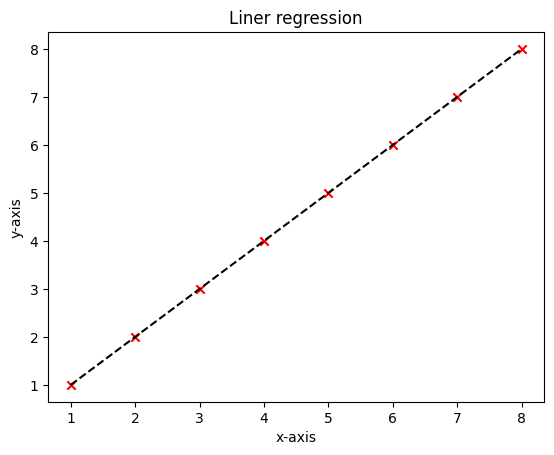

In [15]:
plt.plot(df.x, df.y, linestyle="--", color="black")
plt.scatter(df.x, df.y,  marker="x", color="red")
plt.title("Liner regression")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

#### B. THE ACCURACY OF MEAN IMPUTATION TECHNIQUES FOR HANDLING MISSING DATA

The purpose of this experiment is to demonstrate the transformation of a linear dataset into a non-linear dataset and to evaluate the impact of mean value imputation on the dataset. By using a reverse engineering approach, an original dataset is preserved and a copy of the original dataset is used to create a missing or null dataset. This approach ensures that the mean value remains consistent throughout the entire experiment. The original dataset is not altered, thereby preserving its integrity and serving as a reference point for the analysis.

#### Mean imputation is a method of replacing missing values in a dataset by the mean (average) of the remaining values in that particular column. The characteristics of mean imputation are:

Easy to implement: Mean imputation is a simple and straightforward method to handle missing values. It requires no advanced statistical knowledge or programming skills.

Fast and efficient: Mean imputation is a quick process, making it suitable for large datasets.

Assumes missing values are missing at random: Mean imputation assumes that the missing values are missing at random, which may not always be the case. If the missing values are not missing at random, the imputed mean value may not be representative of the true value.

Can lead to biased results: If the missing values are not missing at random, mean imputation can lead to biased results, as the imputed mean value may not be representative of the true value.

May affect the variability of the data: Replacing missing values with the mean value can affect the variability of the data, making it seem less diverse than it truly is.

In [101]:
# Create a sample dataset with missing values
data = {
    "col1": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    "col2": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300],
    "col3": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000],
    "col4": [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000],
    "col5": [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000]
}

original_df = pd.DataFrame(data)

# Introduce random non-linearity into the dataset
original_df["col2"] = original_df["col2"] * np.random.uniform(0.5, 1.5, size=len(original_df))
original_df["col3"] = original_df["col3"] * np.random.uniform(0.5, 1.5, size=len(original_df))
original_df["col4"] = original_df["col4"] * np.random.uniform(0.5, 1.5, size=len(original_df))
original_df["col5"] = original_df["col5"] * np.random.uniform(0.5, 1.5, size=len(original_df))

In [131]:
original_df

,col1,col2,col3,col4,col5
0,1,5.092634,65.507101,540.114379,5018.012828
1,2,10.237683,183.603659,1239.351416,16655.667001
2,3,32.119428,449.900064,2271.567193,40925.067420
3,4,28.546552,564.971574,4480.654383,42022.781128
4,5,37.374941,275.329320,7165.505047,53623.348736
5,6,40.561682,772.777801,6063.839365,61524.819044
6,7,41.619364,726.333221,6677.038208,51104.981316
7,8,105.699846,1138.653645,4364.544683,90591.869923
8,9,133.597905,1342.206394,7057.724728,94721.709898
9,10,130.278473,1253.883515,5159.867648,111824.388585


#### Overall mean value of original dataset

In [150]:
original_df.mean()

col1        15.500000
col2       154.596327
col3      1754.847491
col4     14340.343137
col5    157239.688501
dtype: float64

### Experiment 1

In [103]:
df = original_df.copy()

In [104]:
# Introduce random missing values into the dataset
df.iloc[5, 1] = np.nan
df.iloc[7, 2] = np.nan
df.iloc[8, 3] = np.nan
df.iloc[10, 4] = np.nan

In [105]:
df

,col1,col2,col3,col4,col5
0,1,5.092634,65.507101,540.114379,5018.012828
1,2,10.237683,183.603659,1239.351416,16655.667001
2,3,32.119428,449.900064,2271.567193,40925.067420
3,4,28.546552,564.971574,4480.654383,42022.781128
4,5,37.374941,275.329320,7165.505047,53623.348736
5,6,NaN,772.777801,6063.839365,61524.819044
6,7,41.619364,726.333221,6677.038208,51104.981316
7,8,105.699846,NaN,4364.544683,90591.869923
8,9,133.597905,1342.206394,NaN,94721.709898
9,10,130.278473,1253.883515,5159.867648,111824.388585


#### 1. PATTERN FOR MISSING VALUE

In [106]:
import missingno as msno

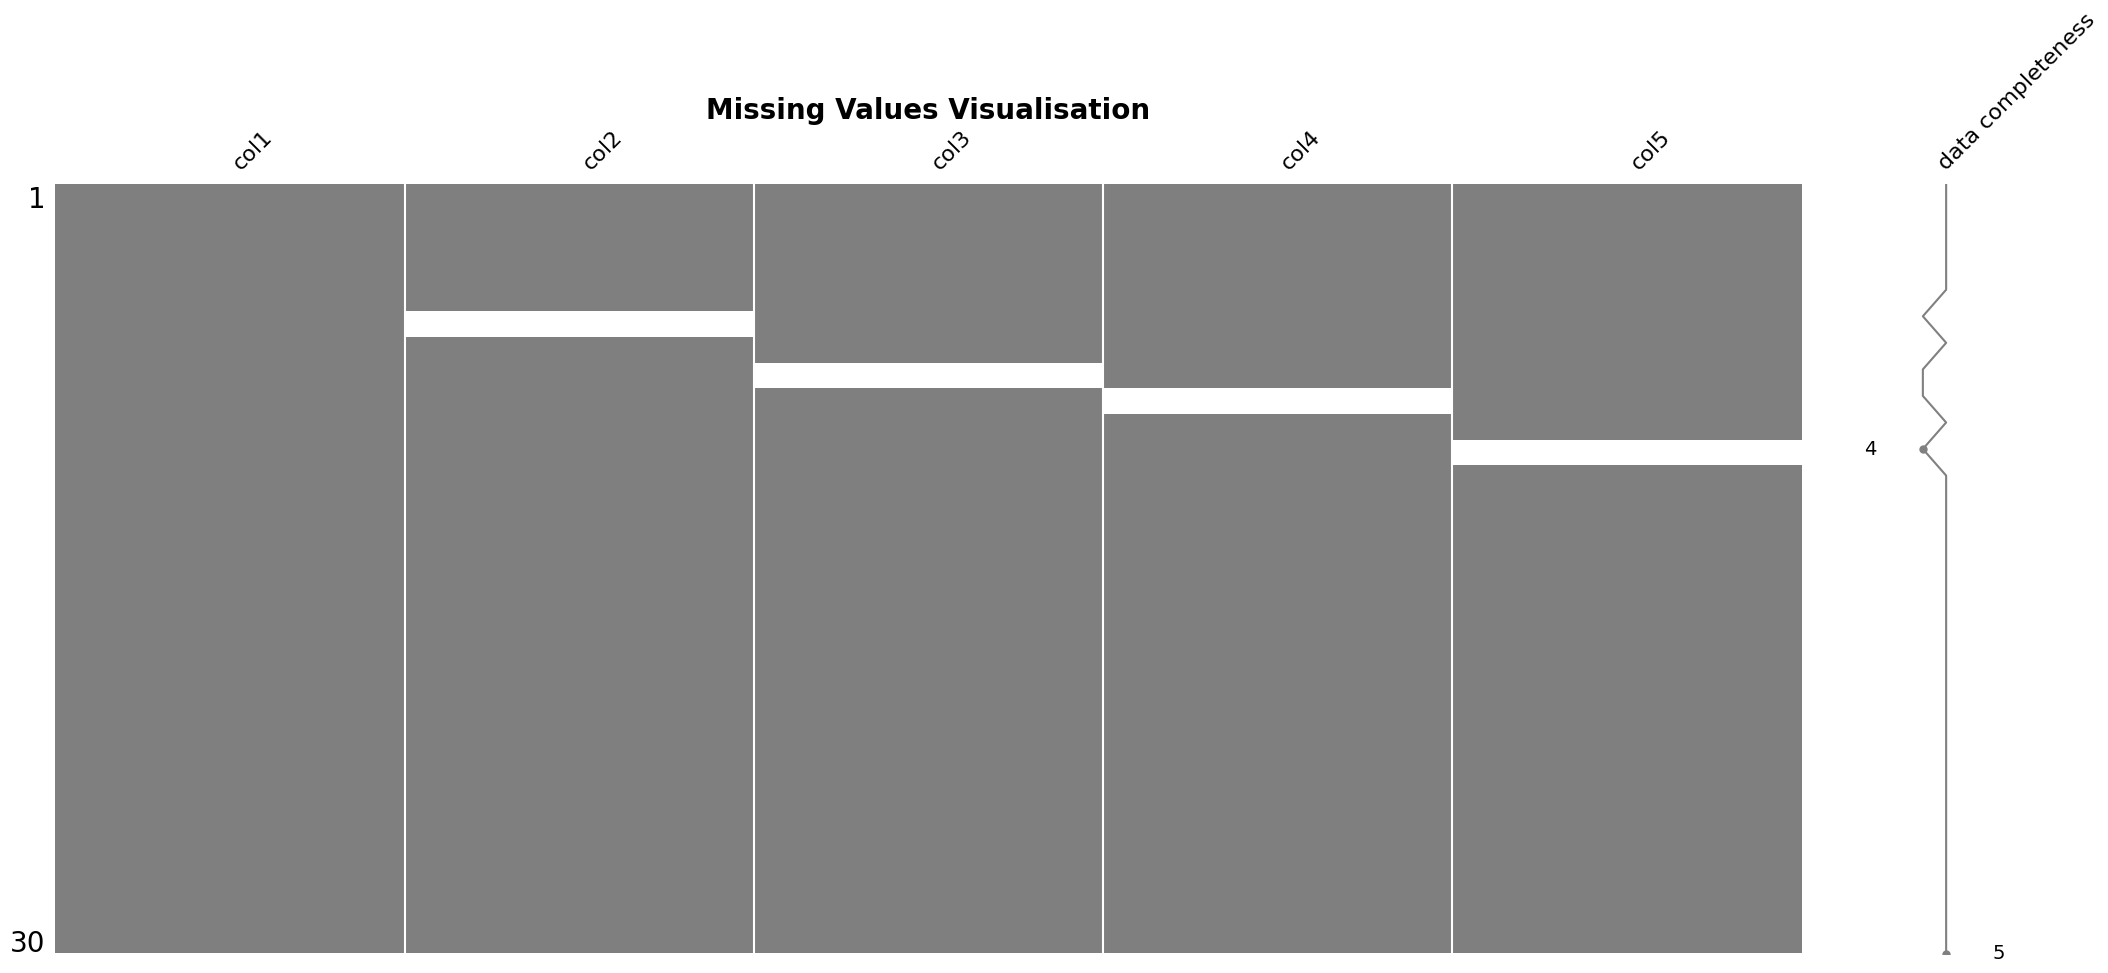

In [107]:
# Use the msno.matrix function from the missingno library to create a visual representation of missing values in the DataFrame
msno.matrix(df, color=(0.5, 0.5, 0.5), labels=True)

# Set the title of the plot with a custom font size and font weight
plt.title('Missing Values Visualisation', fontsize=20, fontweight='bold')

# Display the plot
plt.show()

In [108]:
def visualize_dataframe(df):
    # Get the number of columns in the dataframe
    num_cols = df.shape[1]

    # Plot a scatter plot for each column
    for i in range(num_cols):
        for j in range(i+1, num_cols):
            fig, ax = plt.subplots()

            colors = []
            for k in range(df.shape[0]):
                if df.iloc[k].isnull().any():
                    colors.append('red')
                else:
                    colors.append('blue')
            colors = np.array(colors)

            scatter = ax.scatter(df.iloc[:, i], df.iloc[:, j], c=colors, s=50)

            plt.xlabel(df.columns[i])
            plt.ylabel(df.columns[j])

            plt.show()


This code defines a function called visualize_dataframe that takes a dataframe df as input and creates a scatter plot for each pair of columns in the dataframe. It colors the points in the scatter plot red if any of the values in the corresponding row are missing (NaN) and blue otherwise. Here's a step-by-step explanation of what the code does:

The function calculates the number of columns in the input dataframe using num_cols = df.shape[1].

It creates two nested loops to iterate over each pair of columns in the dataframe. The outer loop iterates from the first column to the second last column (with the index i), and the inner loop iterates from the next column (with the index j) to the last column.

For each pair of columns, it creates a new figure and axis with fig, ax = plt.subplots().

It initializes an empty list colors to store the colors for each point in the scatter plot.

It iterates over each row in the dataframe using a for loop with the index k. If any value in the current row is missing (NaN), it appends 'red' to the colors list; otherwise, it appends 'blue'.

It converts the colors list to a NumPy array.

It creates a scatter plot using the current pair of columns as the x and y values, and assigns the corresponding colors to each point with ax.scatter(df.iloc[:, i], df.iloc[:, j], c=colors, s=50).

It sets the x-axis label to the name of the current column i and the y-axis label to the name of the current column j.

Finally, it displays the scatter plot with plt.show().

This function can be useful for visually exploring the relationship between different pairs of columns in a dataframe and quickly identifying rows with missing values.

#### RED DATA POINT REPRESENT MISSING VALUES AND BLUE ARE NON MISSING VALUES

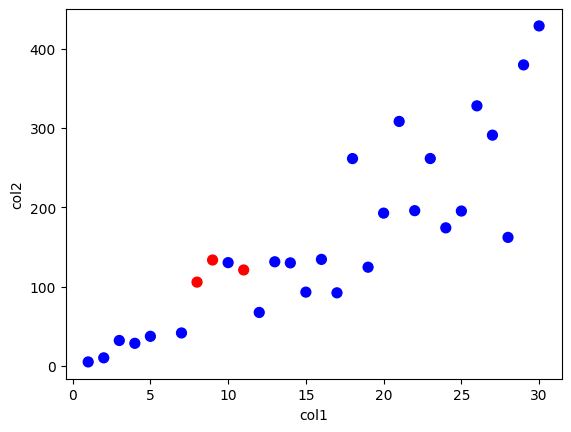

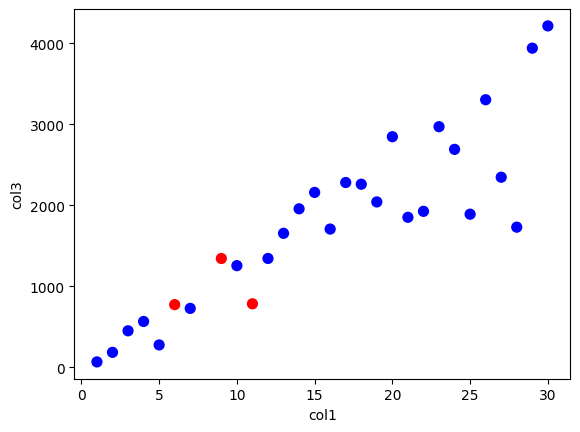

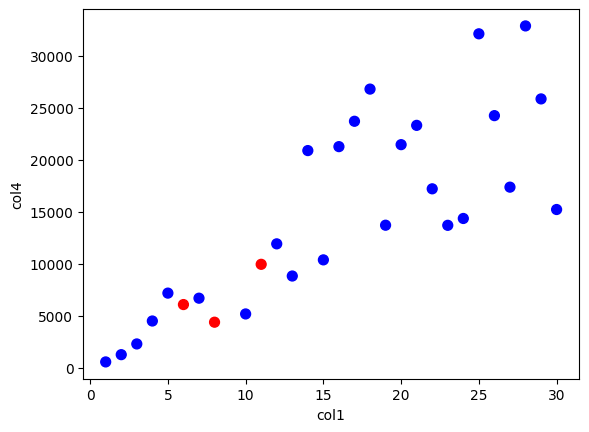

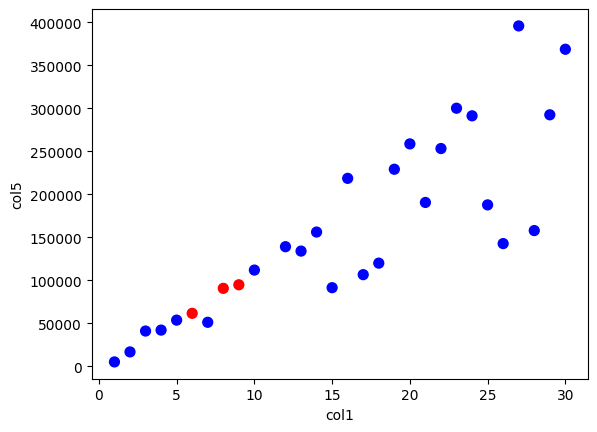

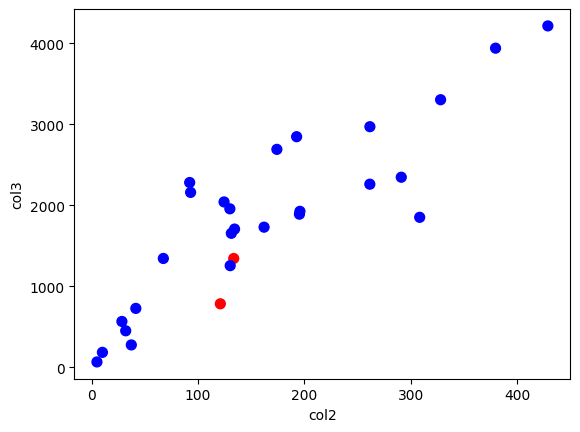

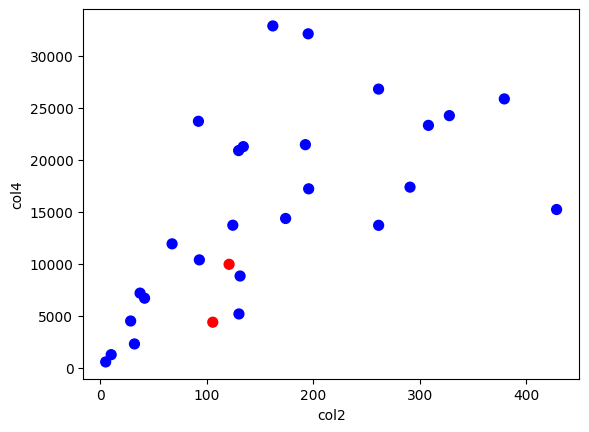

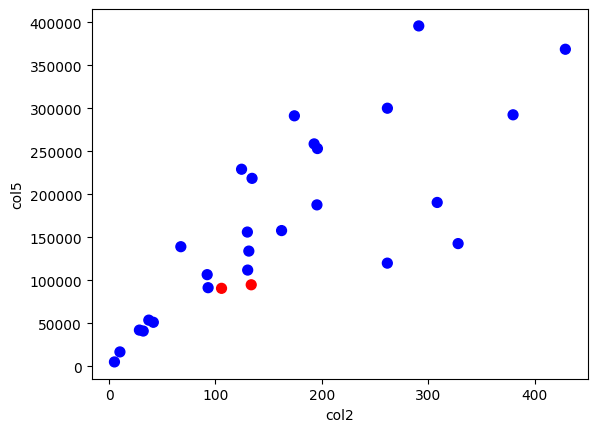

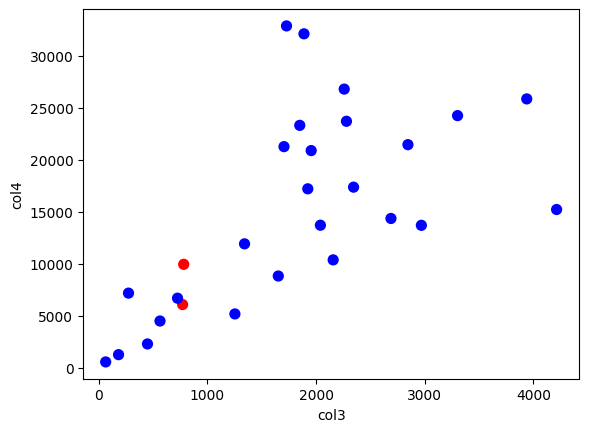

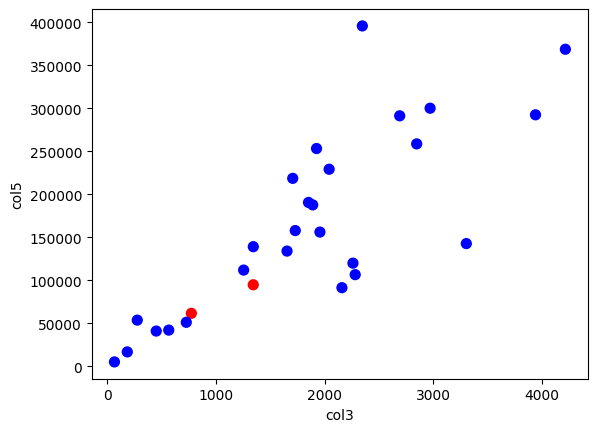

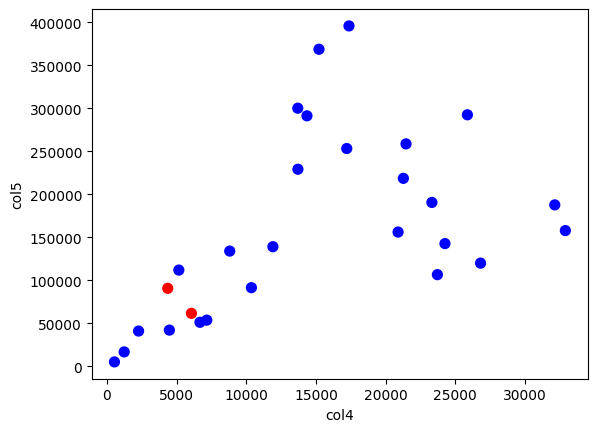

In [109]:
visualize_dataframe(df)

The following experiment involves the imputation of missing values in a linear dataset and comparing the visual patterns before and after the imputation process. A duplicate dataset is created from the original dataset to preserve the mean value throughout the experiment. The purpose of this experiment is to demonstrate the impact of mean value imputation on the overall dataset.

In [110]:
# Impute missing values with the mean of the column
df_temp = original_df.copy()
df_temp = df_temp.fillna(original_df.mean())

In [111]:
df_temp

,col1,col2,col3,col4,col5
0,1,5.092634,65.507101,540.114379,5018.012828
1,2,10.237683,183.603659,1239.351416,16655.667001
2,3,32.119428,449.900064,2271.567193,40925.067420
3,4,28.546552,564.971574,4480.654383,42022.781128
4,5,37.374941,275.329320,7165.505047,53623.348736
5,6,40.561682,772.777801,6063.839365,61524.819044
6,7,41.619364,726.333221,6677.038208,51104.981316
7,8,105.699846,1138.653645,4364.544683,90591.869923
8,9,133.597905,1342.206394,7057.724728,94721.709898
9,10,130.278473,1253.883515,5159.867648,111824.388585


#### Now Comparision Imputed dataset and Missing dataset. it show nearly same pattern.

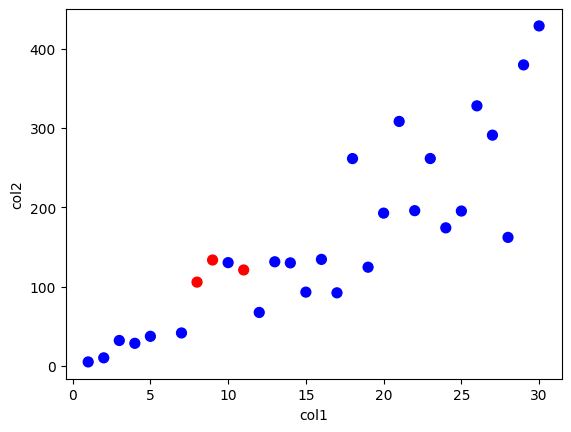

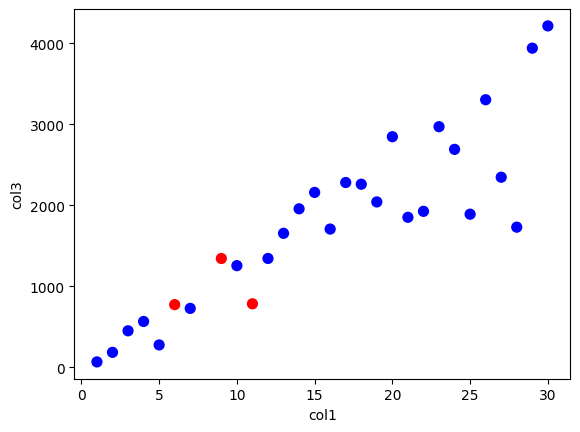

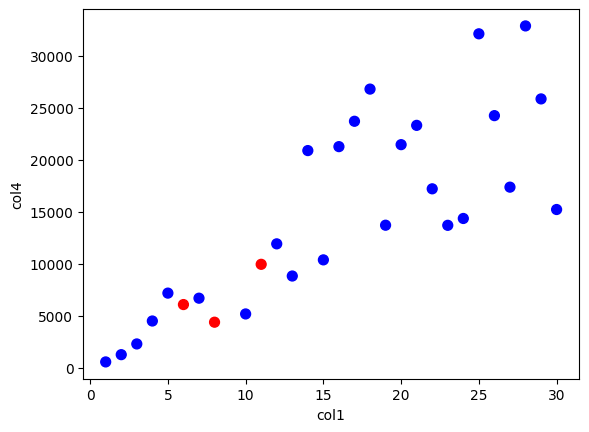

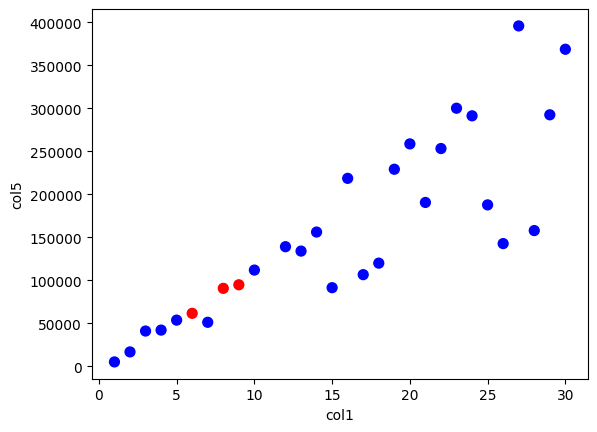

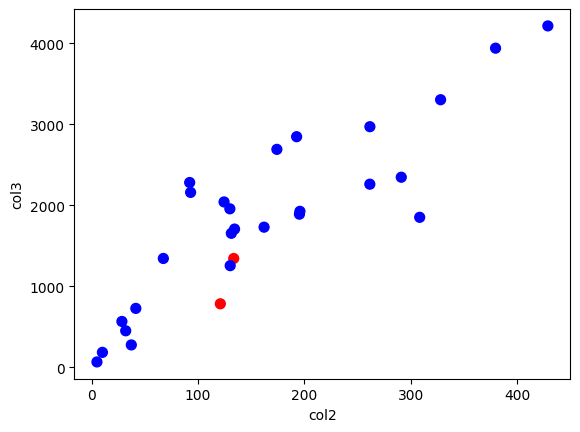

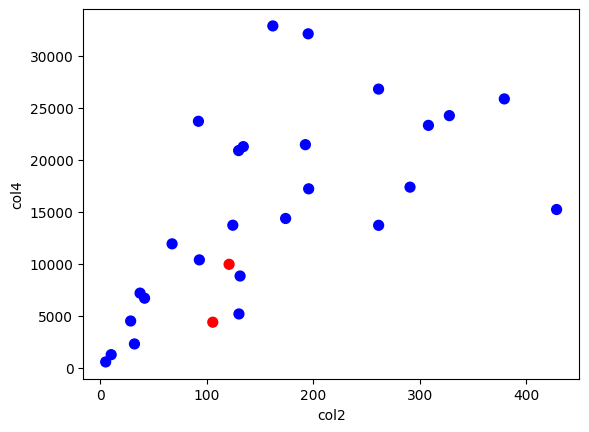

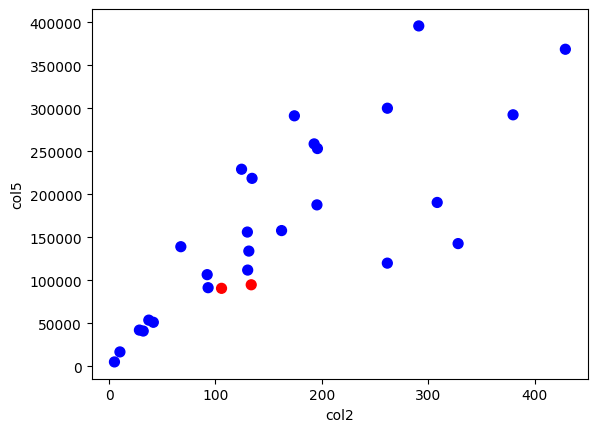

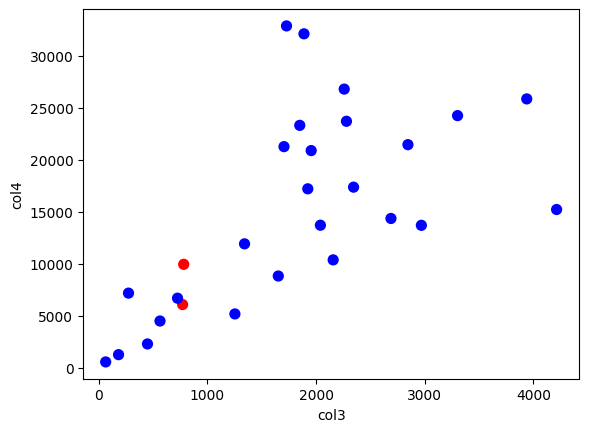

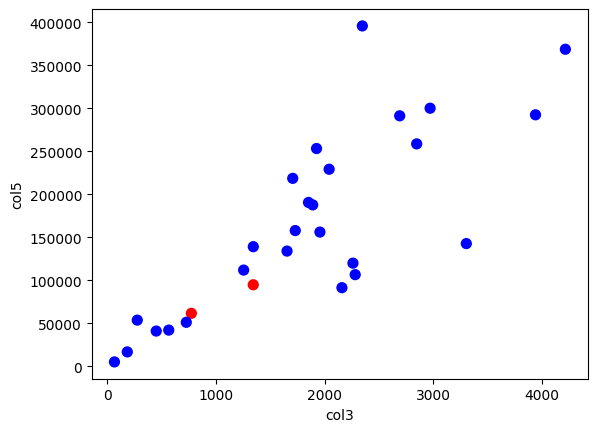

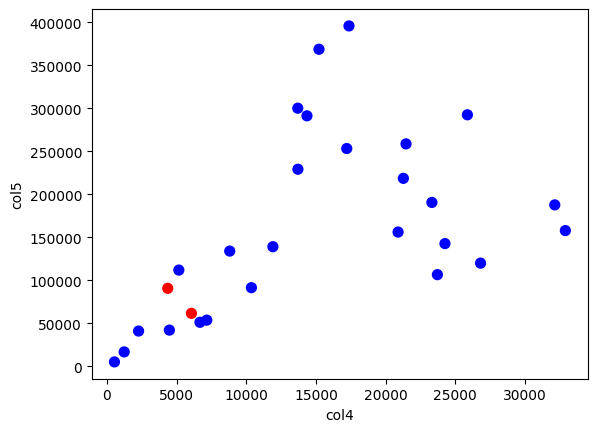

In [112]:
visualize_dataframe(df)

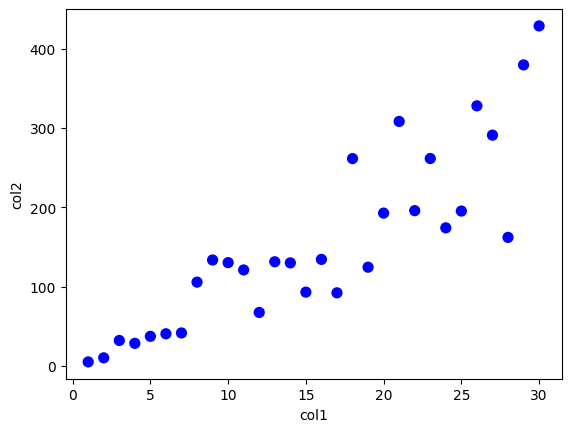

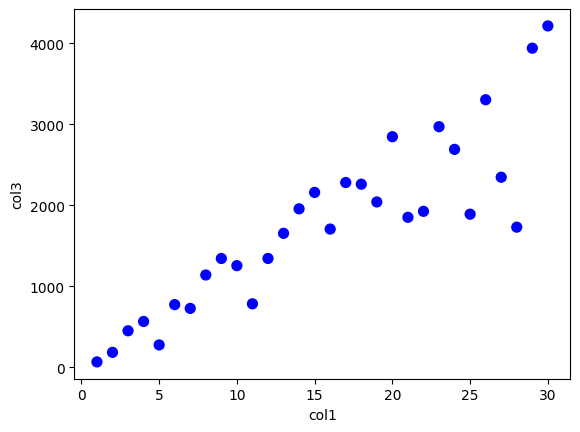

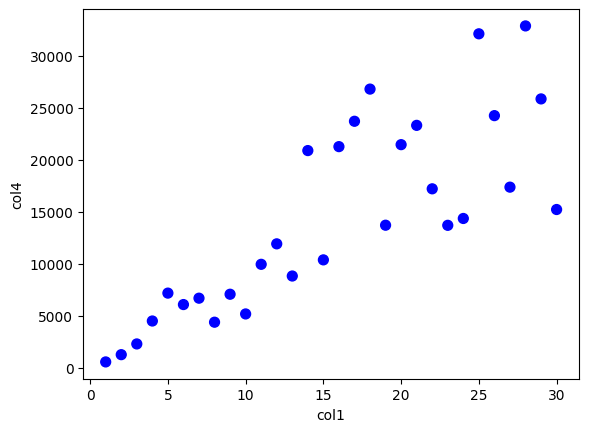

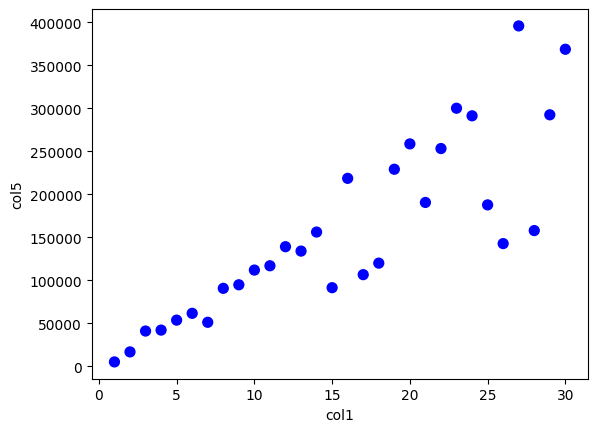

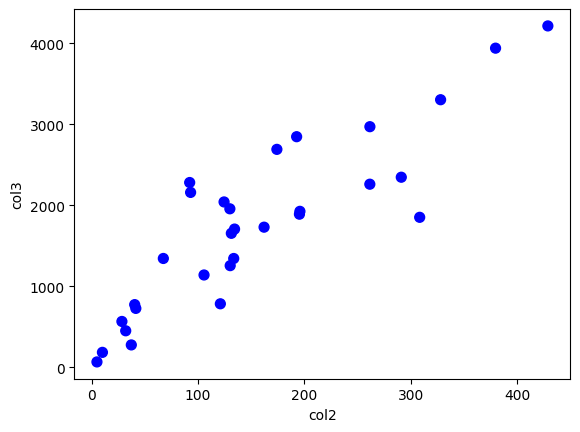

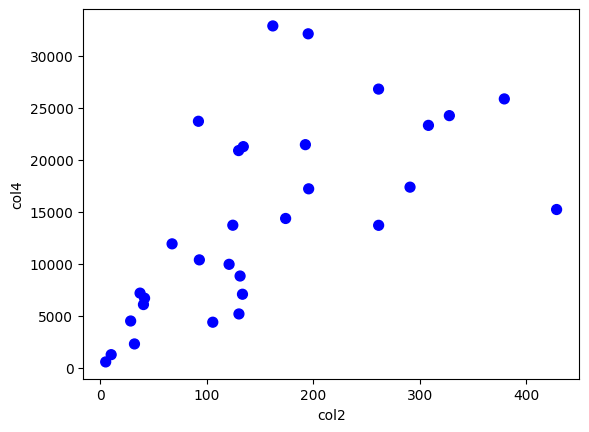

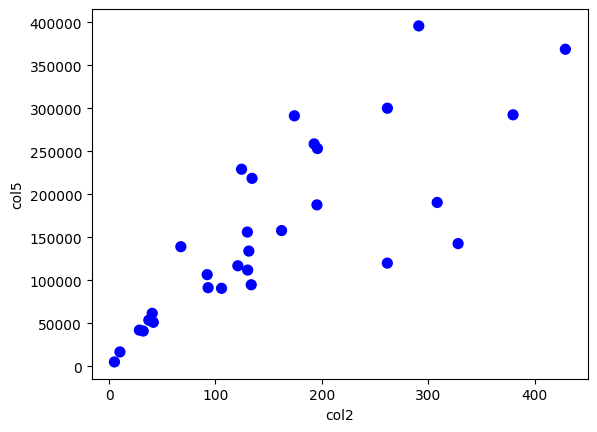

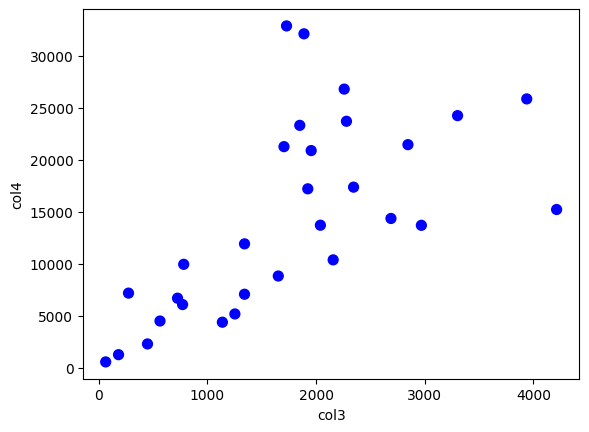

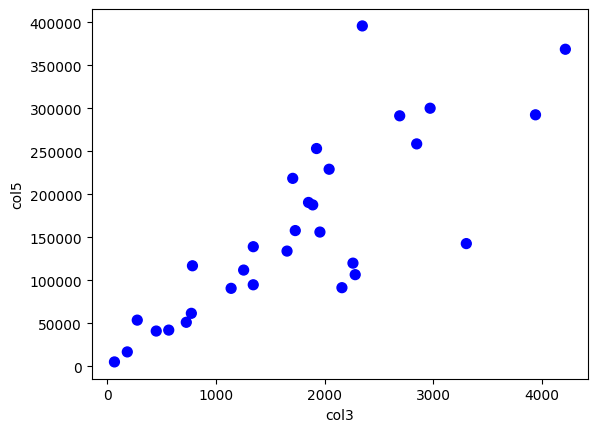

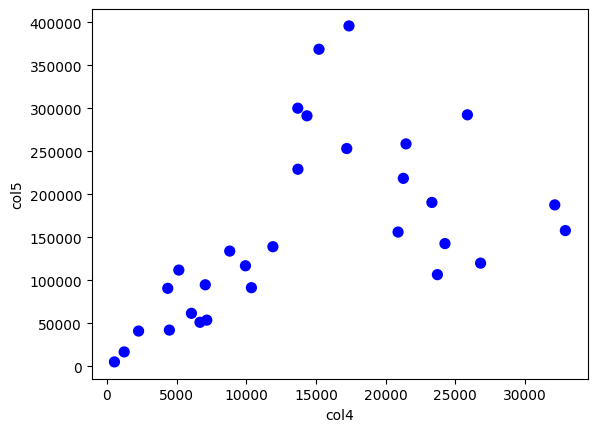

In [113]:
visualize_dataframe(df_temp)

### Experiment 2

In [114]:
df2 = original_df.copy()

In [115]:
# Introduce random missing values into the dataset
df2.iloc[29, 1] = np.nan
df2.iloc[25, 2] = np.nan
df2.iloc[12, 3] = np.nan
df2.iloc[5, 4] = np.nan

In [116]:
df2

,col1,col2,col3,col4,col5
0,1,5.092634,65.507101,540.114379,5018.012828
1,2,10.237683,183.603659,1239.351416,16655.667001
2,3,32.119428,449.900064,2271.567193,40925.067420
3,4,28.546552,564.971574,4480.654383,42022.781128
4,5,37.374941,275.329320,7165.505047,53623.348736
5,6,40.561682,772.777801,6063.839365,NaN
6,7,41.619364,726.333221,6677.038208,51104.981316
7,8,105.699846,1138.653645,4364.544683,90591.869923
8,9,133.597905,1342.206394,7057.724728,94721.709898
9,10,130.278473,1253.883515,5159.867648,111824.388585


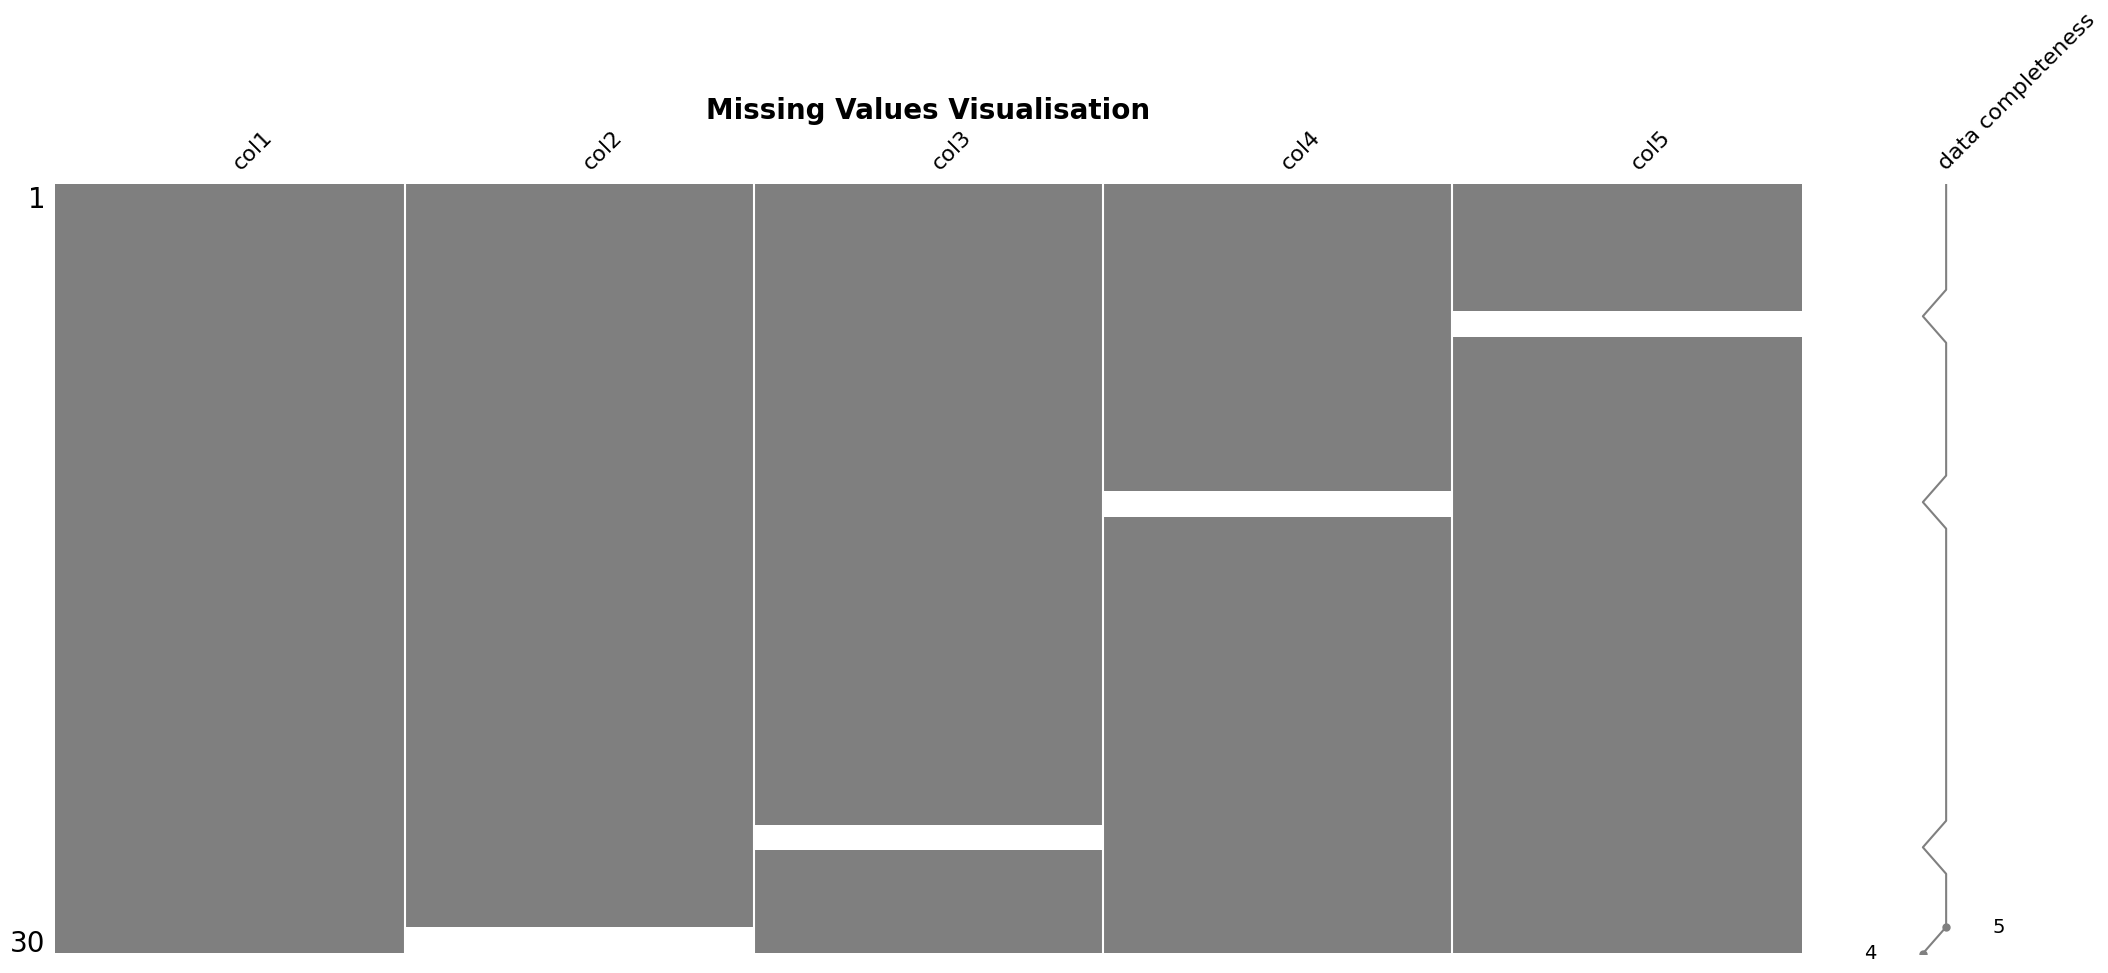

In [117]:
# Use the msno.matrix function from the missingno library to create a visual representation of missing values in the DataFrame
msno.matrix(df2, color=(0.5, 0.5, 0.5), labels=True)

# Set the title of the plot with a custom font size and font weight
plt.title('Missing Values Visualisation', fontsize=20, fontweight='bold')

# Display the plot
plt.show()

In [118]:
df_temp2 = df2.copy()

In [119]:
df_temp2 = df_temp2.fillna(original_df.mean())

In [120]:
df_temp2

,col1,col2,col3,col4,col5
0,1,5.092634,65.507101,540.114379,5018.012828
1,2,10.237683,183.603659,1239.351416,16655.667001
2,3,32.119428,449.900064,2271.567193,40925.067420
3,4,28.546552,564.971574,4480.654383,42022.781128
4,5,37.374941,275.329320,7165.505047,53623.348736
5,6,40.561682,772.777801,6063.839365,157239.688501
6,7,41.619364,726.333221,6677.038208,51104.981316
7,8,105.699846,1138.653645,4364.544683,90591.869923
8,9,133.597905,1342.206394,7057.724728,94721.709898
9,10,130.278473,1253.883515,5159.867648,111824.388585


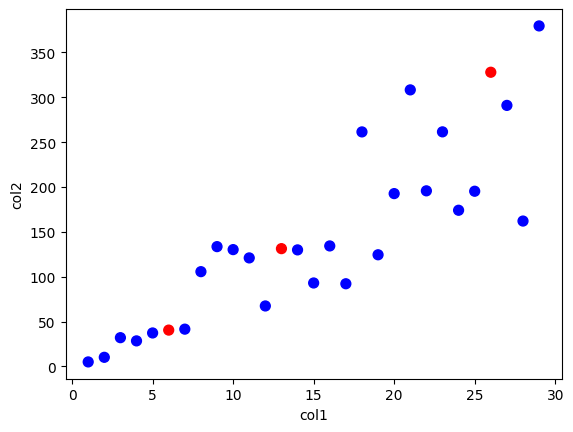

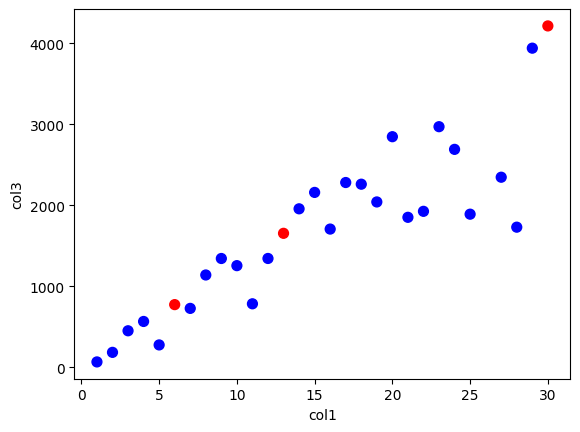

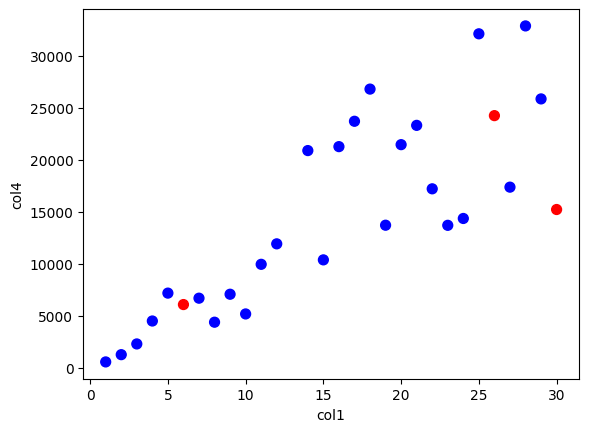

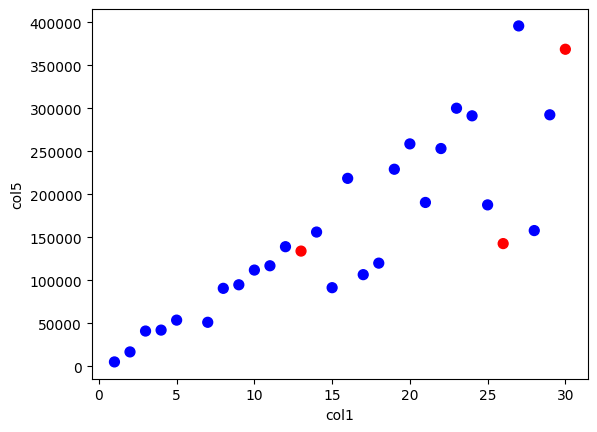

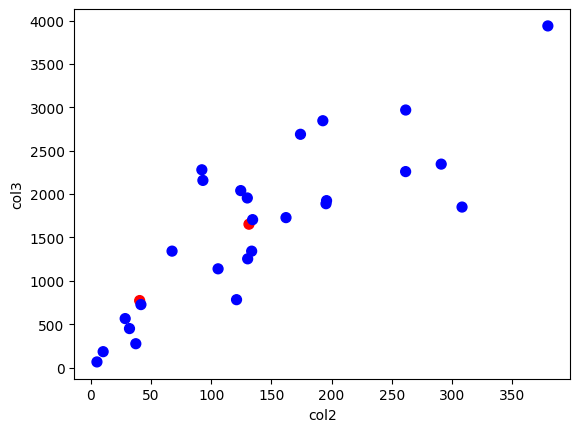

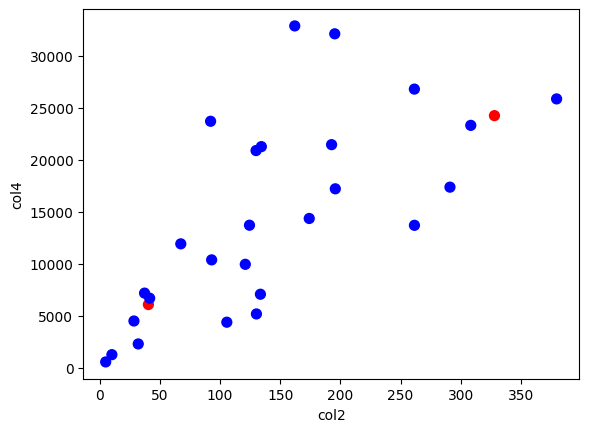

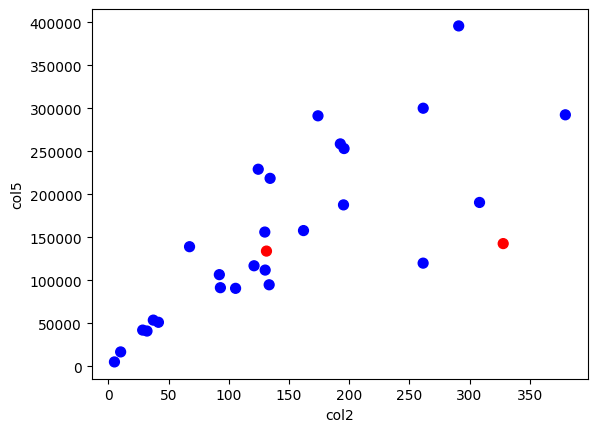

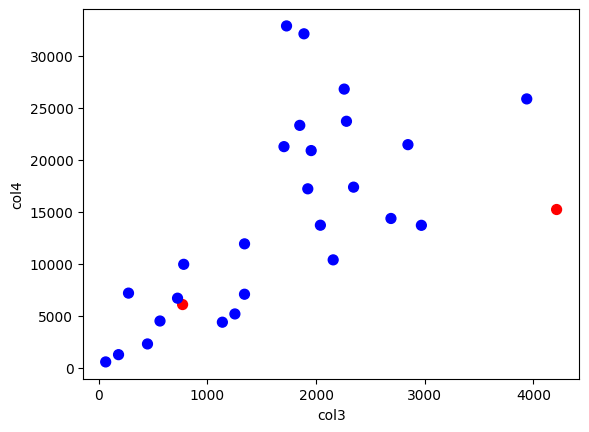

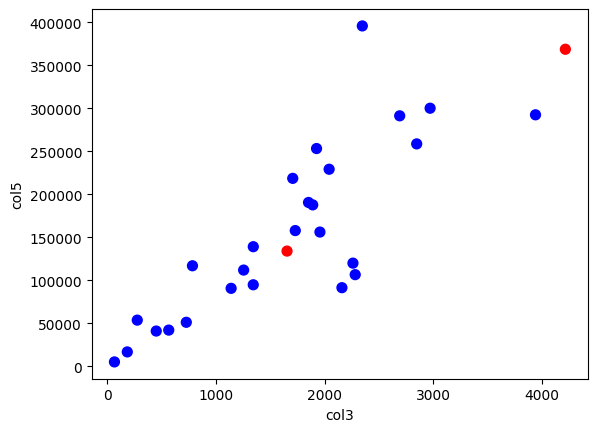

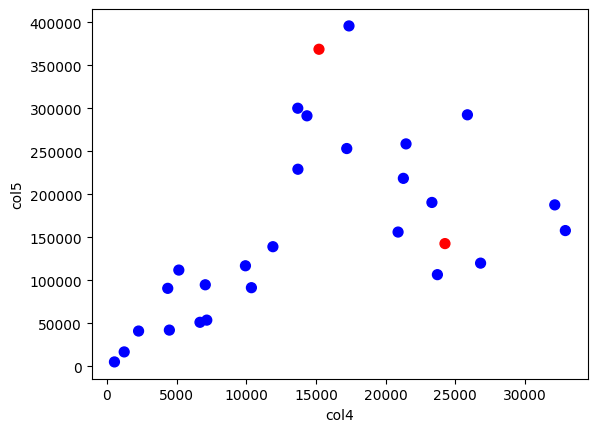

In [121]:
visualize_dataframe(df2)

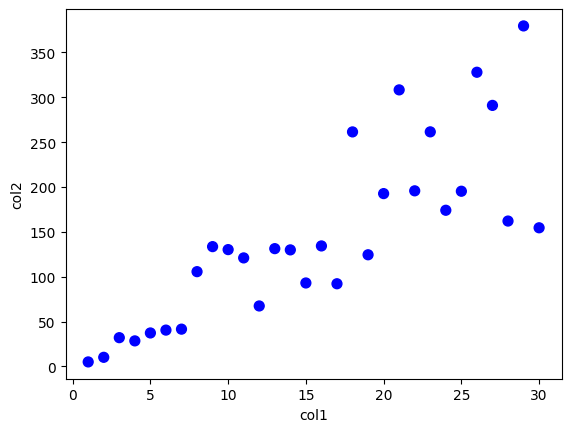

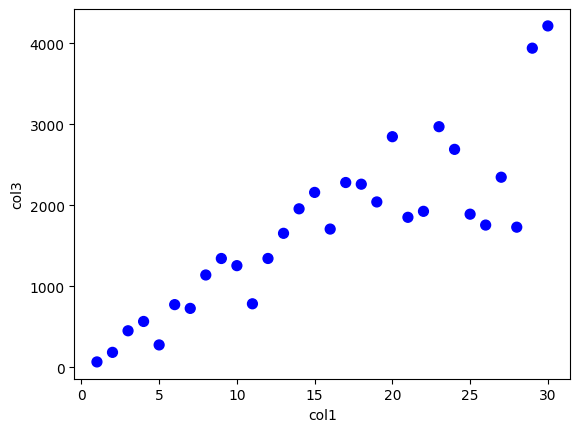

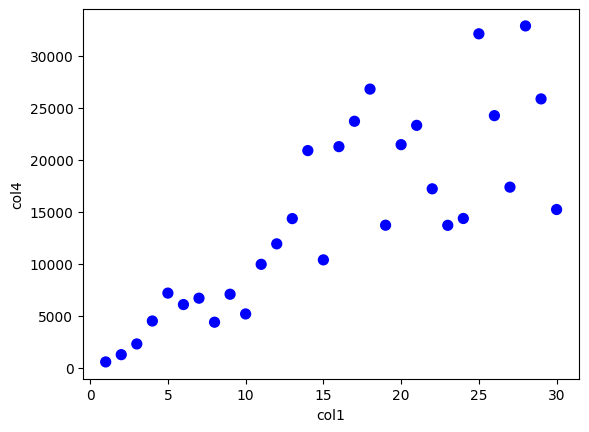

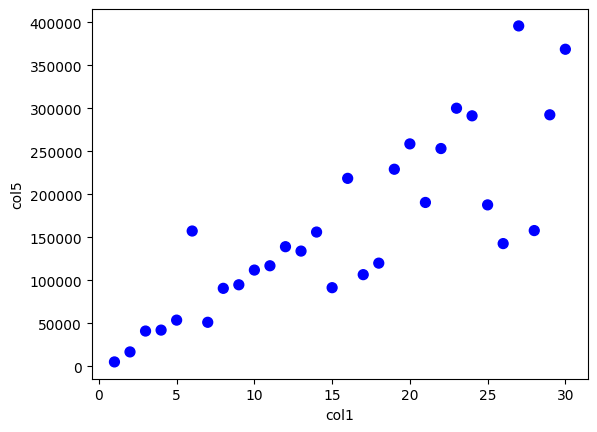

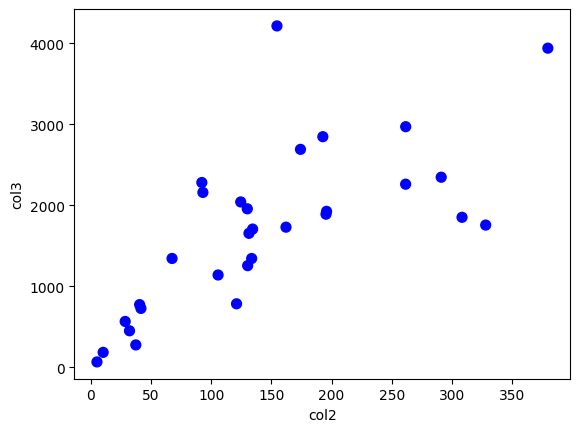

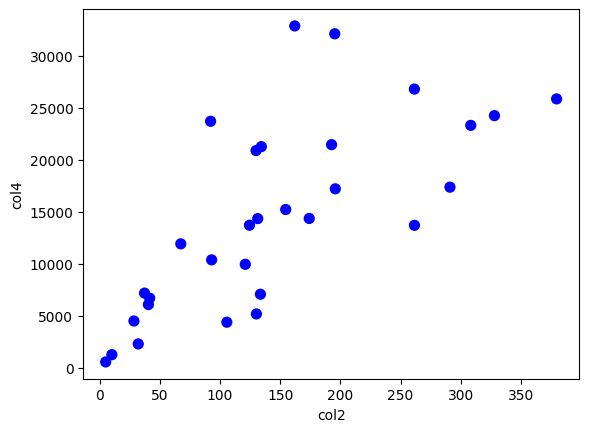

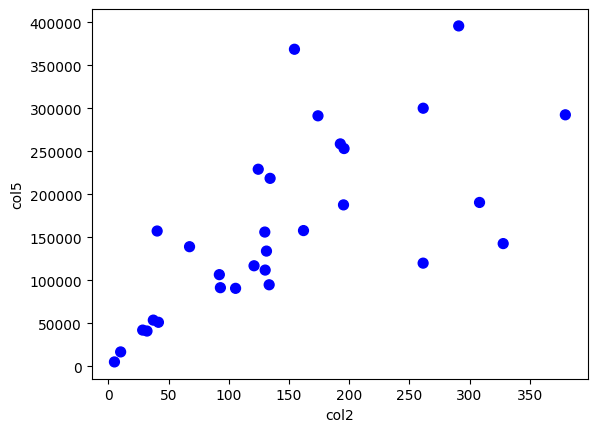

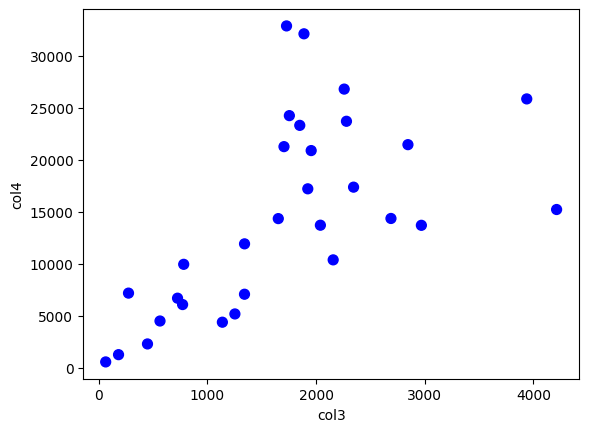

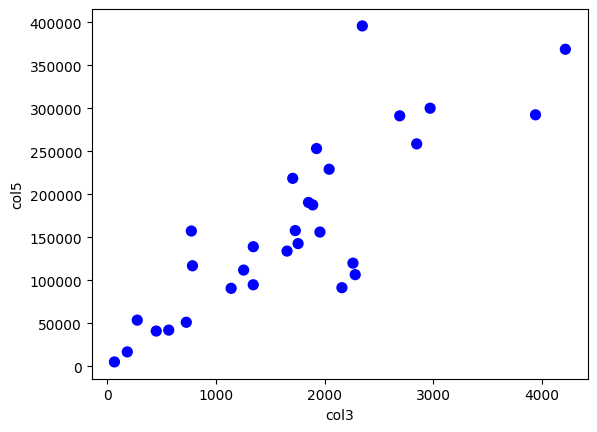

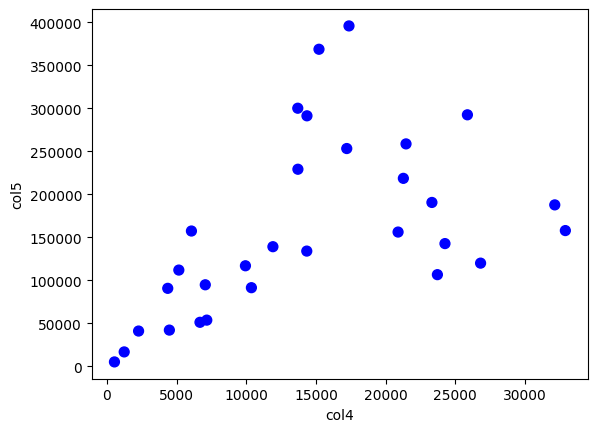

In [122]:
visualize_dataframe(df_temp2)

### Experiment 3

In [123]:
df_final = original_df.copy()
# Introduce random missing values into the dataset
df_final.iloc[5, 1] = np.nan
df_final.iloc[7, 2] = np.nan
df_final.iloc[8, 3] = np.nan
df_final.iloc[10, 4] = np.nan

df_final.iloc[12, 1] = np.nan
df_final.iloc[17, 2] = np.nan
df_final.iloc[29, 3] = np.nan
df_final.iloc[16, 4] = np.nan

df_final.iloc[29, 1] = np.nan
df_final.iloc[25, 2] = np.nan
df_final.iloc[12, 3] = np.nan
df_final.iloc[5, 4] = np.nan

In [124]:
df_final

,col1,col2,col3,col4,col5
0,1,5.092634,65.507101,540.114379,5018.012828
1,2,10.237683,183.603659,1239.351416,16655.667001
2,3,32.119428,449.900064,2271.567193,40925.067420
3,4,28.546552,564.971574,4480.654383,42022.781128
4,5,37.374941,275.329320,7165.505047,53623.348736
5,6,NaN,772.777801,6063.839365,NaN
6,7,41.619364,726.333221,6677.038208,51104.981316
7,8,105.699846,NaN,4364.544683,90591.869923
8,9,133.597905,1342.206394,NaN,94721.709898
9,10,130.278473,1253.883515,5159.867648,111824.388585


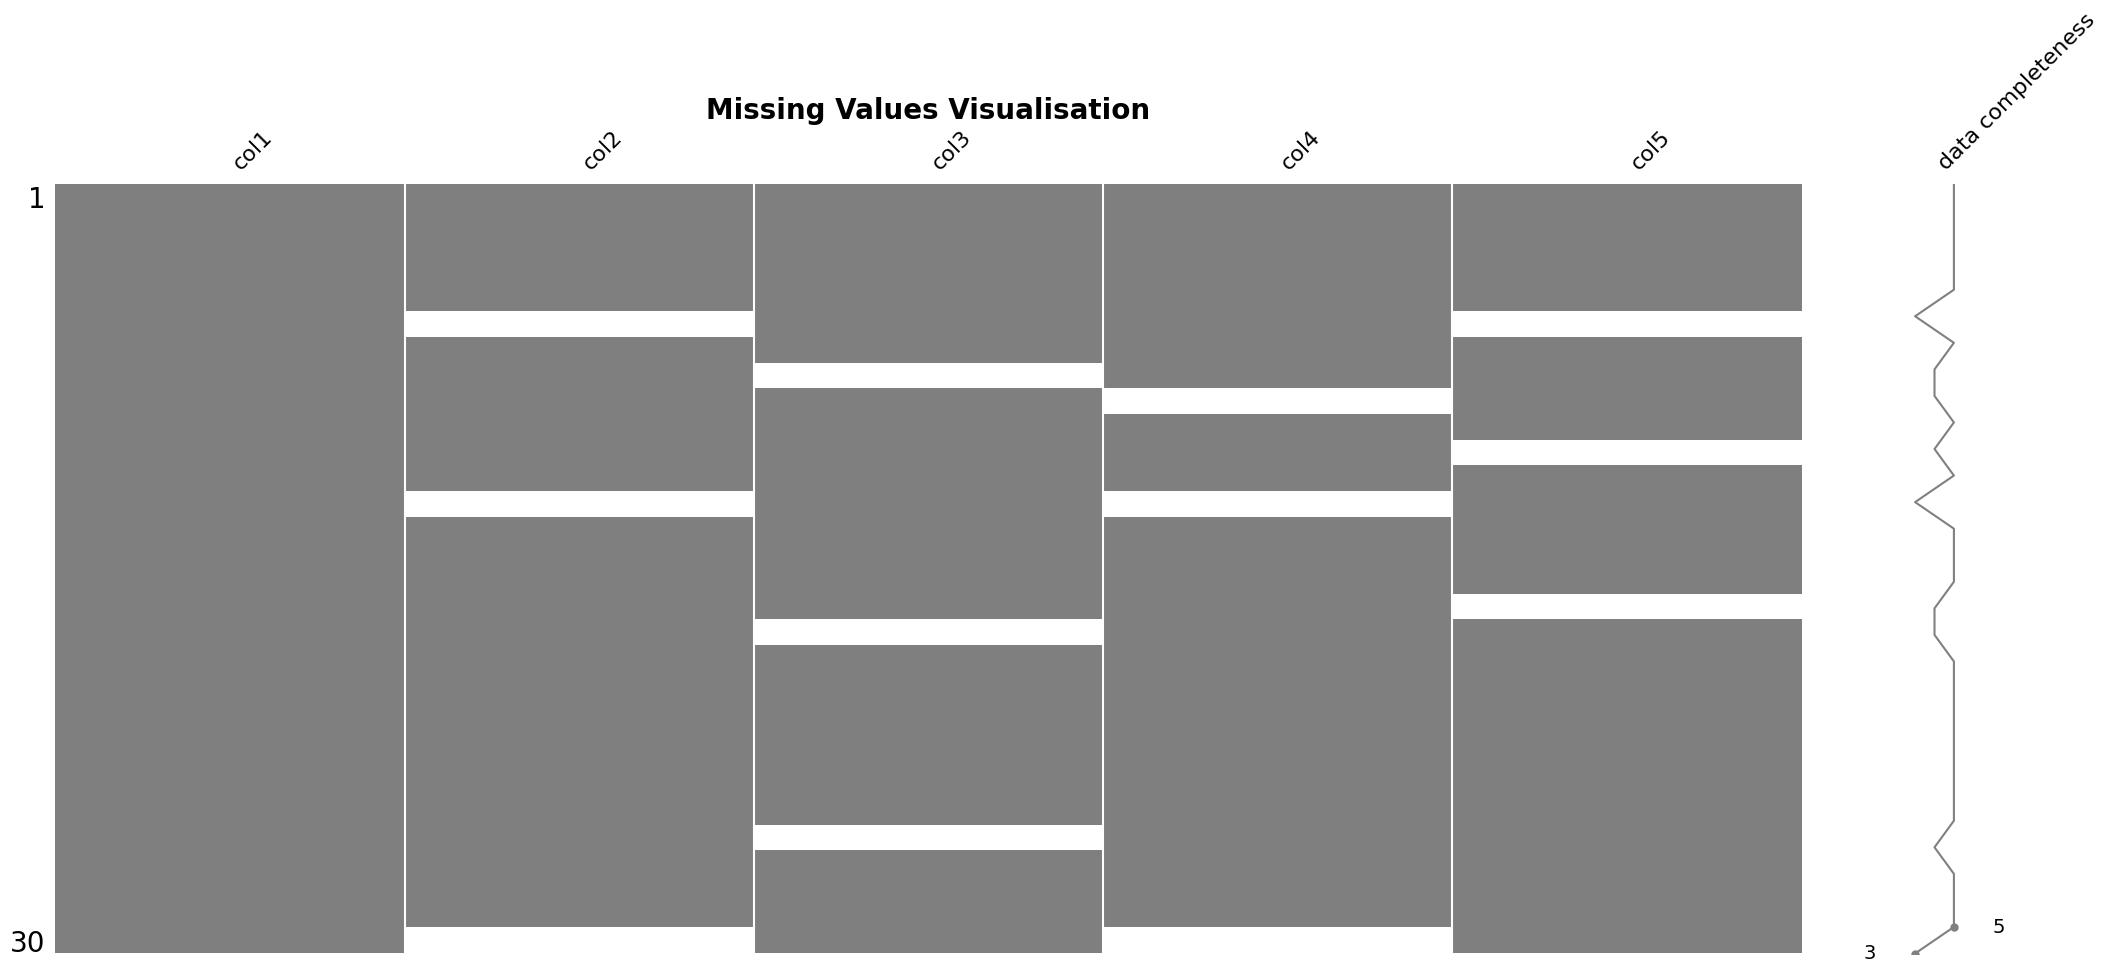

In [125]:
# Use the msno.matrix function from the missingno library to create a visual representation of missing values in the DataFrame
msno.matrix(df_final, color=(0.5, 0.5, 0.5), labels=True)

# Set the title of the plot with a custom font size and font weight
plt.title('Missing Values Visualisation', fontsize=20, fontweight='bold')

# Display the plot
plt.show()

In [126]:
df_temp3 = df_final.copy()

In [127]:
df_temp3 = df_temp3.fillna(original_df.mean())

In [128]:
df_temp3

,col1,col2,col3,col4,col5
0,1,5.092634,65.507101,540.114379,5018.012828
1,2,10.237683,183.603659,1239.351416,16655.667001
2,3,32.119428,449.900064,2271.567193,40925.067420
3,4,28.546552,564.971574,4480.654383,42022.781128
4,5,37.374941,275.329320,7165.505047,53623.348736
5,6,154.596327,772.777801,6063.839365,157239.688501
6,7,41.619364,726.333221,6677.038208,51104.981316
7,8,105.699846,1754.847491,4364.544683,90591.869923
8,9,133.597905,1342.206394,14340.343137,94721.709898
9,10,130.278473,1253.883515,5159.867648,111824.388585


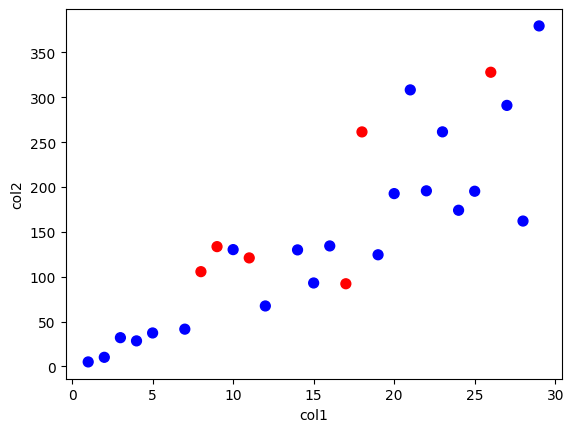

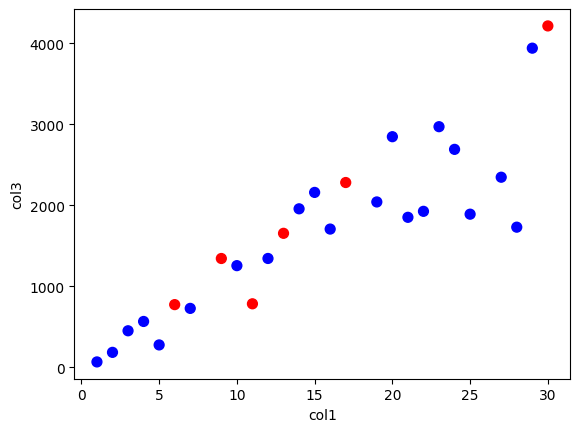

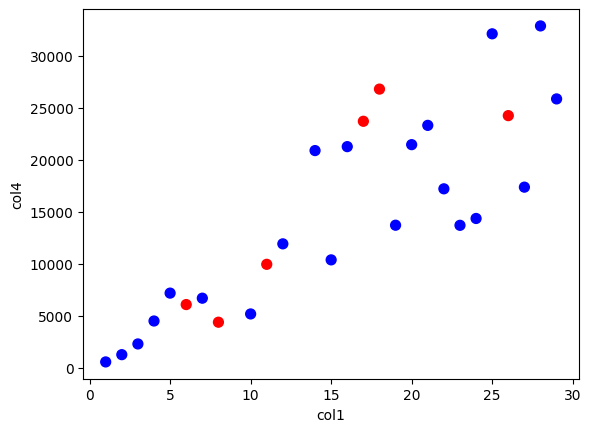

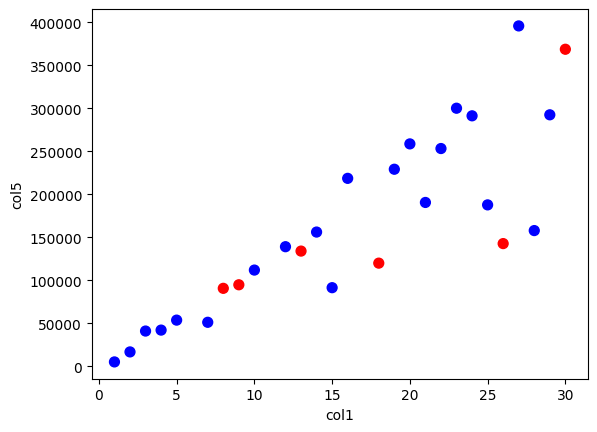

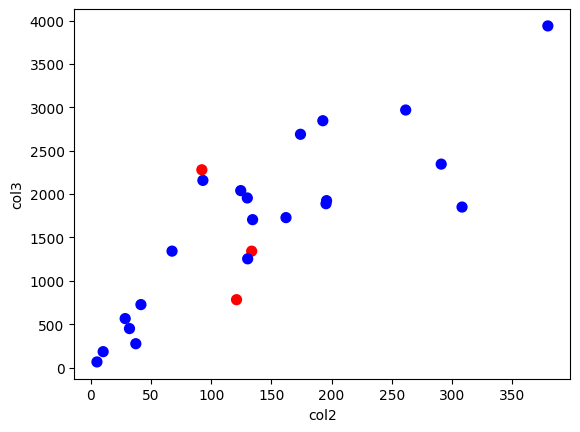

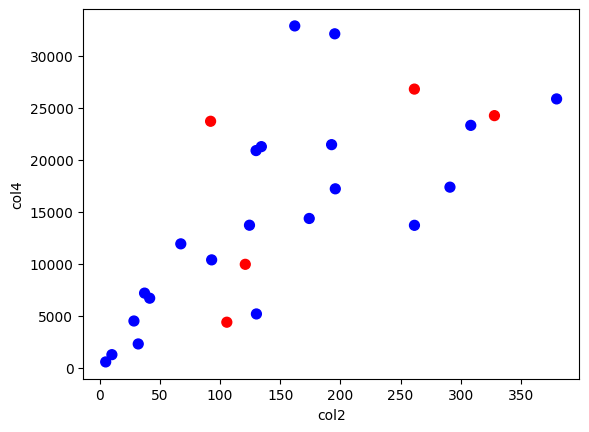

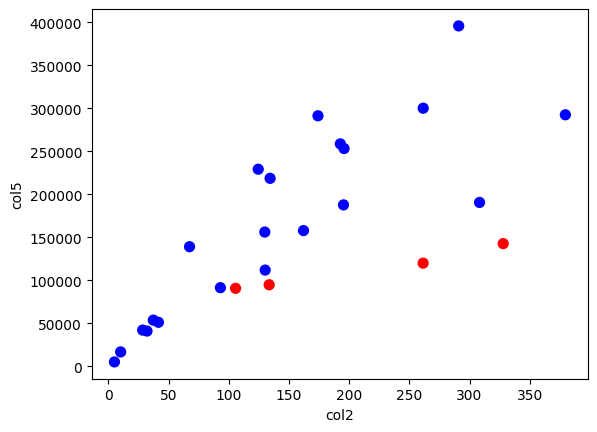

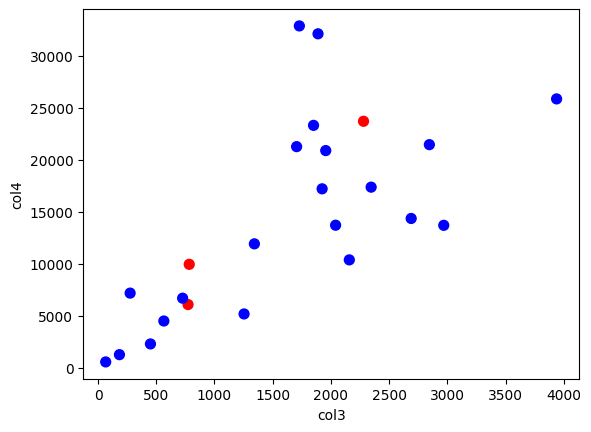

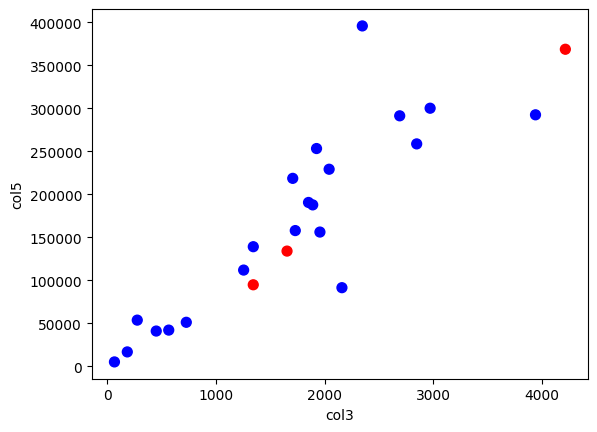

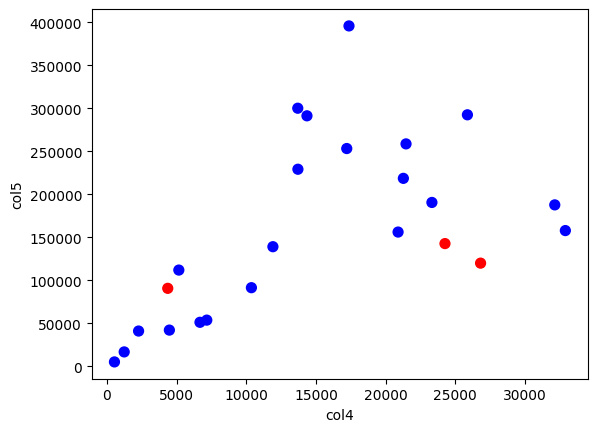

In [129]:
visualize_dataframe(df_final)

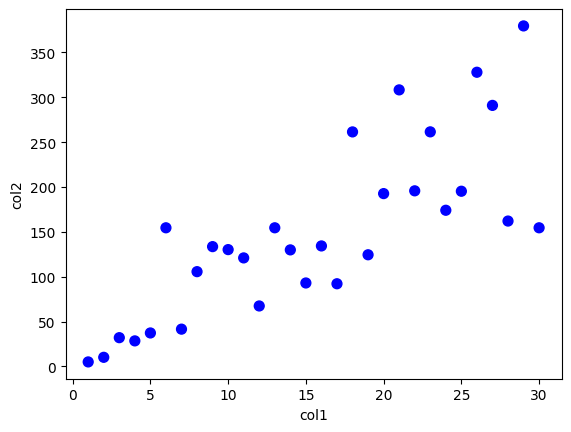

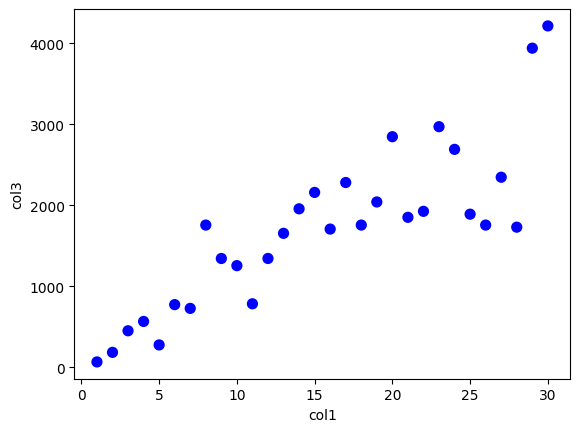

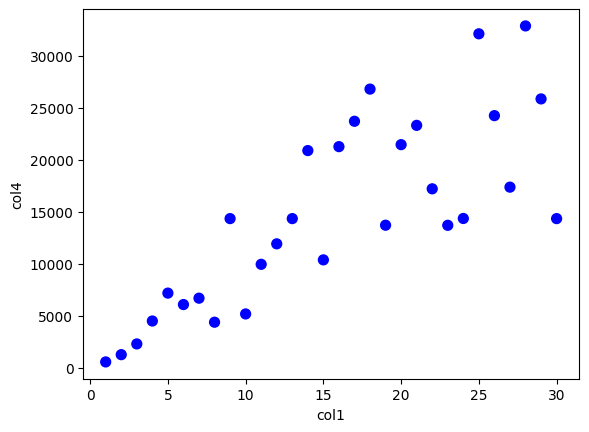

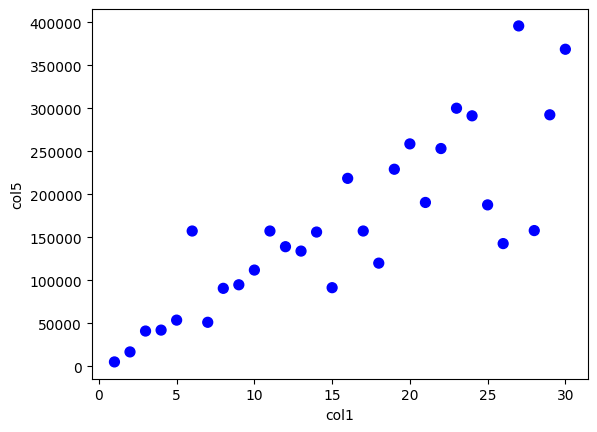

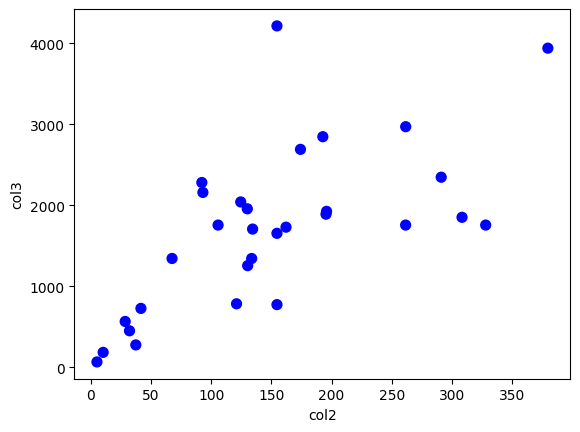

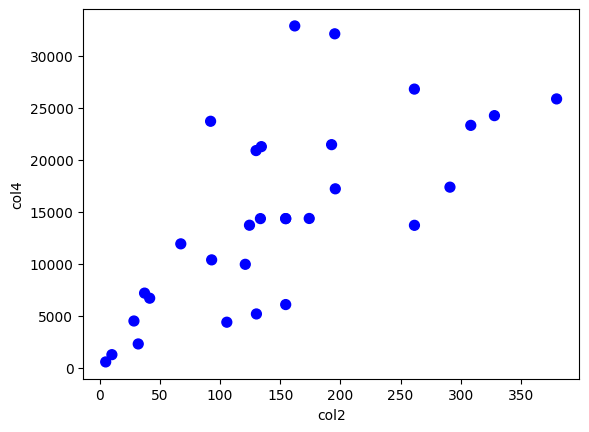

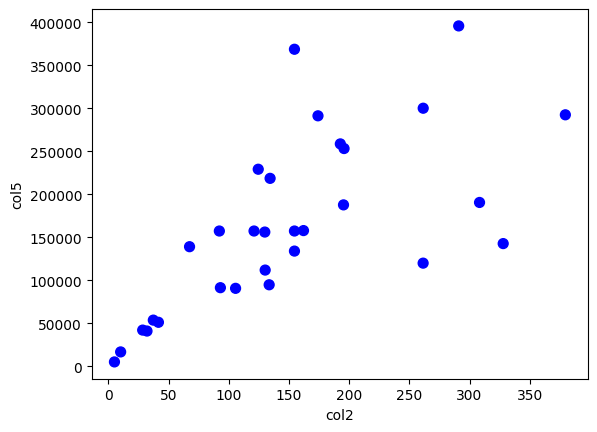

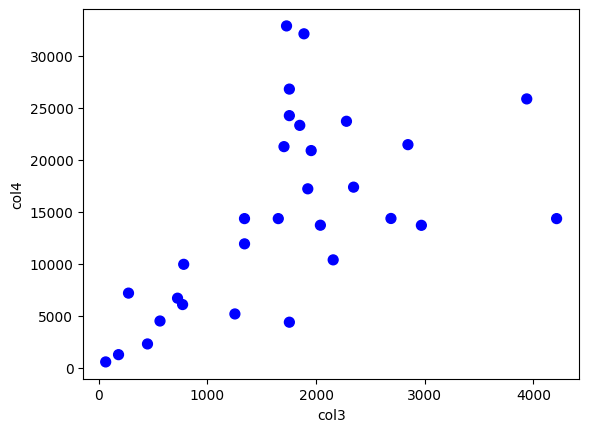

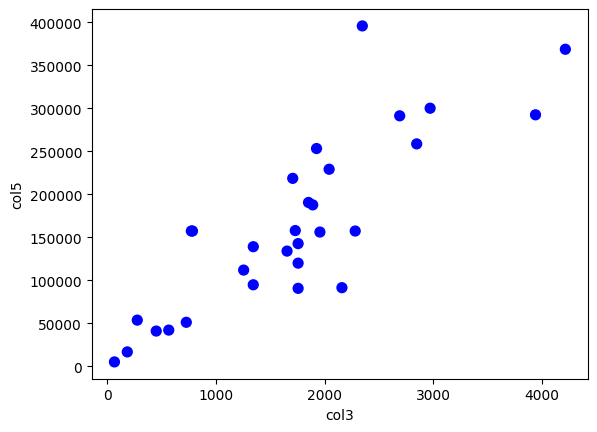

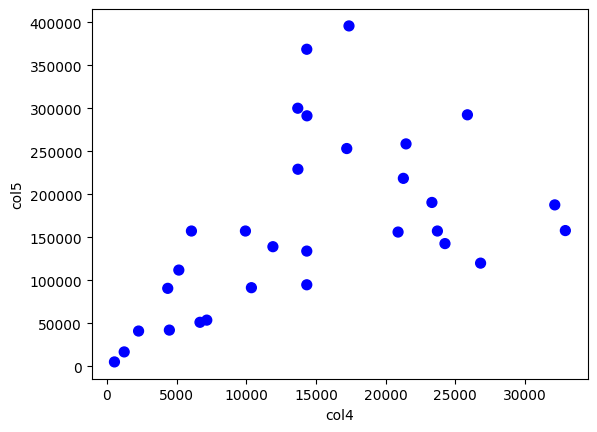

In [130]:
visualize_dataframe(df_temp3)

## Conclusion:
    
The reason why the visual patterns remain the same after imputing the missing values with the mean values is because the mean is a robust statistic that is not easily influenced by outliers or extreme values. When the missing values are replaced with the mean, the overall distribution of the data remains unchanged, so the visual patterns in the data remain largely unchanged as well. This demonstrates the power of using the mean as an imputation method, as it helps to maintain the overall structure of the data, even in the presence of missing values.

### 1. Original Mean and Distribution for data comparision between Imputed dataset from original mean.

In [151]:
original_df.mean()

col1        15.500000
col2       154.596327
col3      1754.847491
col4     14340.343137
col5    157239.688501
dtype: float64

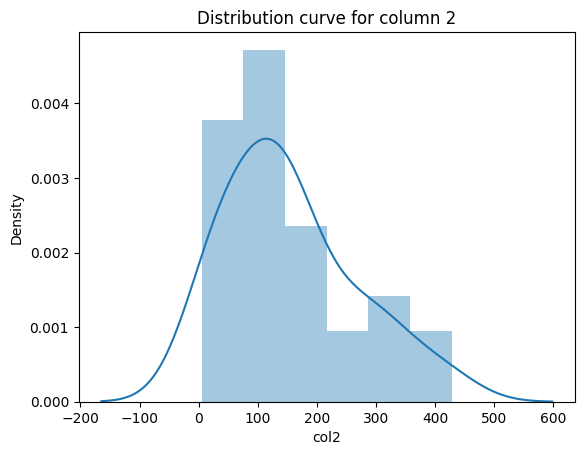

In [146]:
# Plot the distribution curve for column 2
sns.distplot(original_df.col2)
plt.title("Distribution curve for column 2")
plt.show()

In [152]:
df_temp.mean()

col1        15.500000
col2       154.596327
col3      1754.847491
col4     14340.343137
col5    157239.688501
dtype: float64

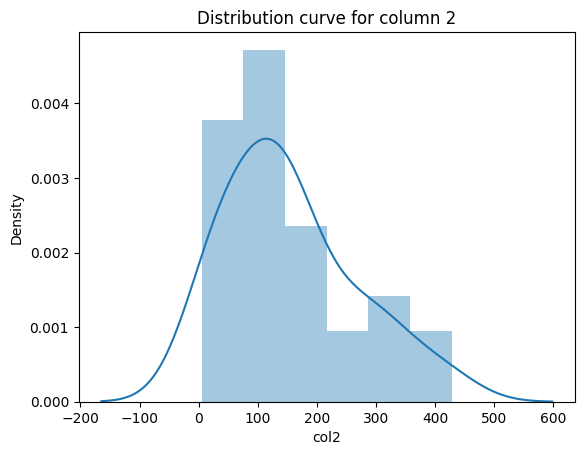

In [147]:
# Plot the distribution curve for column 2
sns.distplot(df_temp.col2)
plt.title("Distribution curve for column 2")
plt.show()

In [153]:
df_temp2.mean()

col1        15.500000
col2       145.458380
col3      1703.274944
col4     14524.617893
col5    160430.184150
dtype: float64

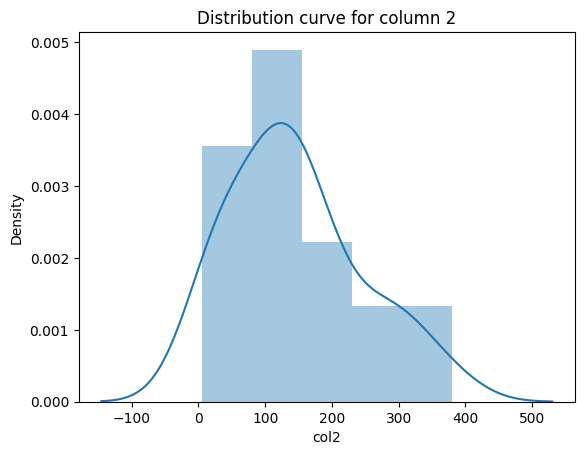

In [148]:
# Plot the distribution curve for column 2
sns.distplot(df_temp2.col2)
plt.title("Distribution curve for column 2")
plt.show()

In [155]:
df_temp3.mean()

col1        15.500000
col2       150.034215
col3      1707.001017
col4     14738.180691
col5    163468.746465
dtype: float64

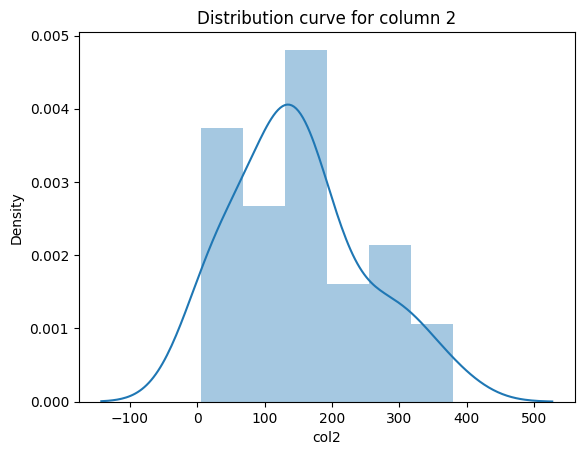

In [149]:
# Plot the distribution curve for column 2
sns.distplot(df_temp3.col2)
plt.title("Distribution curve for column 2")
plt.show()

#### 2. Overall presentation of mean values into single visualisation.

In [218]:
original_mean = original_df.mean()
exp_mean = df_temp.mean()
exp2_mean = df_temp2.mean()
exp3_mean = df_temp3.mean()

In [219]:
# Combine all the mean values into a single data frame
mean_df = pd.DataFrame({
    'Original': original_mean,
    'Experiment': exp_mean,
    'Experiment 2': exp2_mean,
    'Experiment 3': exp3_mean
})

In [220]:
mean_df

,Original,Experiment,Experiment 2,Experiment 3
col1,15.500000,15.500000,15.500000,15.500000
col2,154.596327,154.596327,145.458380,150.034215
col3,1754.847491,1754.847491,1703.274944,1707.001017
col4,14340.343137,14340.343137,14524.617893,14738.180691
col5,157239.688501,157239.688501,160430.184150,163468.746465


In [229]:
mean_df['Error 1'] = abs(mean_df['Original'] - mean_df['Experiment'])
mean_df['Error 2'] = abs(mean_df['Original'] - mean_df['Experiment 2'])
mean_df['Error 3'] = abs(mean_df['Original'] - mean_df['Experiment 3'])

In [230]:
mean_df

,Original,Experiment,Experiment 2,Experiment 3,Error 1,Error 2,Error 3
col1,15.500000,15.500000,15.500000,15.500000,0.0,0.000000,0.000000
col2,154.596327,154.596327,145.458380,150.034215,0.0,9.137947,4.562112
col3,1754.847491,1754.847491,1703.274944,1707.001017,0.0,51.572546,47.846473
col4,14340.343137,14340.343137,14524.617893,14738.180691,0.0,184.274756,397.837555
col5,157239.688501,157239.688501,160430.184150,163468.746465,0.0,3190.495649,6229.057964


### Now, we are ploting  loss information with visualisation. The high error values suggest that the mean values imputed in the experiments deviate significantly from the original data, leading to a loss of information. 

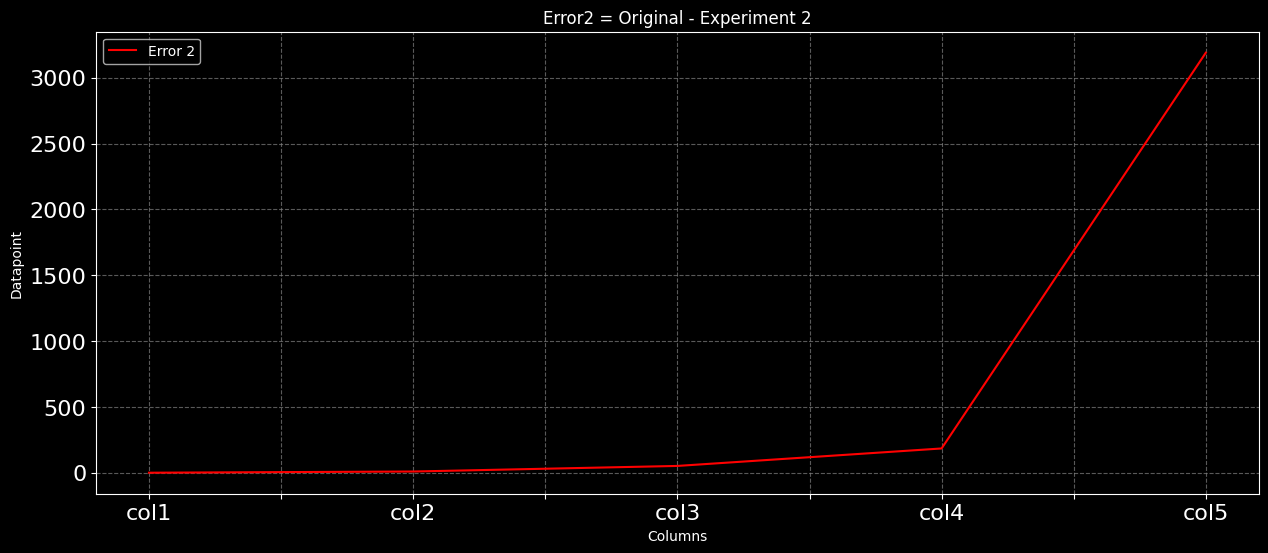

In [238]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
mean_df['Error 2'].plot(color="red")
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Columns')
plt.ylabel('Datapoint')
plt.title('Error2 = Original - Experiment 2')
plt.legend()
plt.show()

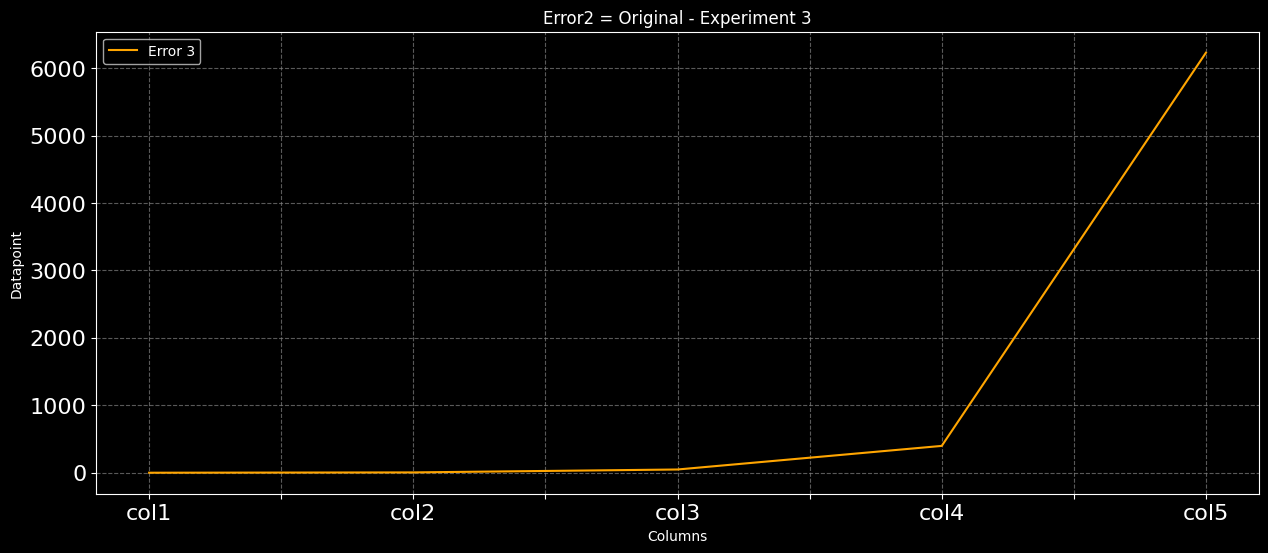

In [240]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
mean_df['Error 3'].plot(color="orange")
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Columns')
plt.ylabel('Datapoint')
plt.title('Error2 = Original - Experiment 3')
plt.legend()
plt.show()

#### 3. Comparision between Higher nad lower dataset Lost Information

Hence, it has been proven with an experiment that higher the datset, we will have higher lost of information during imputation. 

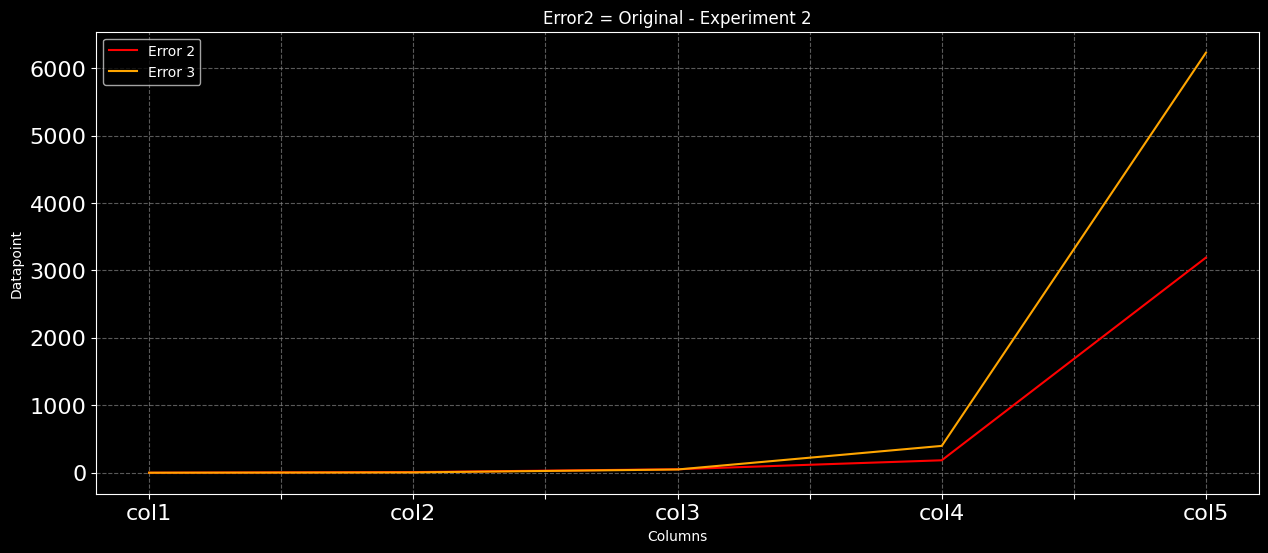

In [241]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
mean_df['Error 2'].plot(color="red")
mean_df['Error 3'].plot(color="orange")
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Columns')
plt.ylabel('Datapoint')
plt.title('Error2 = Original - Experiment 2')
plt.legend()
plt.show()

### 4. Percentage Error = (Absolute Error / Original Value) * 100

In [249]:
mean_df['Percentage Error 1'] =  (mean_df['Error 1']/mean_df['Original'] * 100)
mean_df['Percentage Error 2'] =  (mean_df['Error 2']/mean_df['Original'] * 100)
mean_df['Percentage Error 3'] =  (mean_df['Error 3']/mean_df['Original'] * 100)

In [250]:
mean_df

,Original,Experiment,Experiment 2,Experiment 3,Error 1,Error 2,Error 3,Percentage Error 1,Percentage Error 2,Percentage Error 3
col1,15.500000,15.500000,15.500000,15.500000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
col2,154.596327,154.596327,145.458380,150.034215,0.0,9.137947,4.562112,0.0,5.910843,2.950984
col3,1754.847491,1754.847491,1703.274944,1707.001017,0.0,51.572546,47.846473,0.0,2.938862,2.726532
col4,14340.343137,14340.343137,14524.617893,14738.180691,0.0,184.274756,397.837555,0.0,1.285009,2.774254
col5,157239.688501,157239.688501,160430.184150,163468.746465,0.0,3190.495649,6229.057964,0.0,2.029065,3.961505


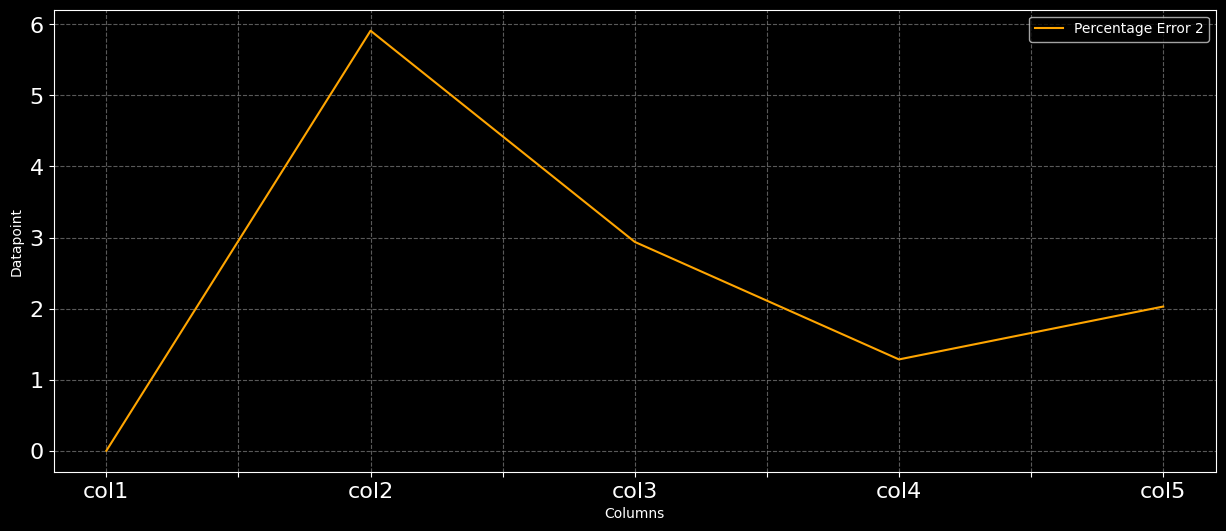

In [256]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
mean_df['Percentage Error 2'].plot(color="orange")
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Columns')
plt.ylabel('Datapoint')
plt.legend()
plt.show()

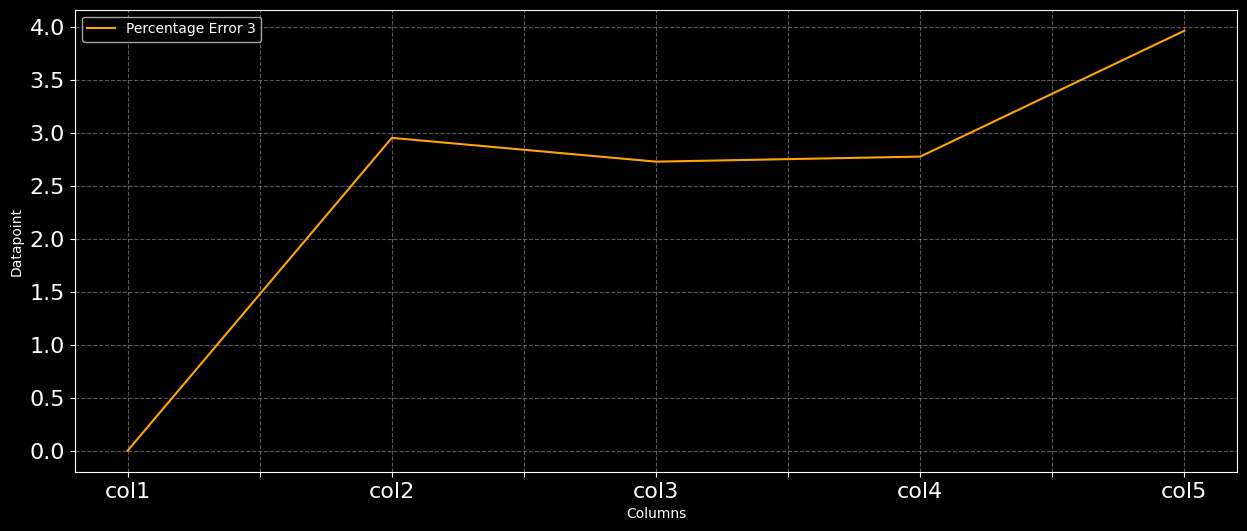

In [257]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
mean_df['Percentage Error 3'].plot(color="orange")
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Columns')
plt.ylabel('Datapoint')
plt.legend()
plt.show()

### 5. Projecting Various Distribution Curves

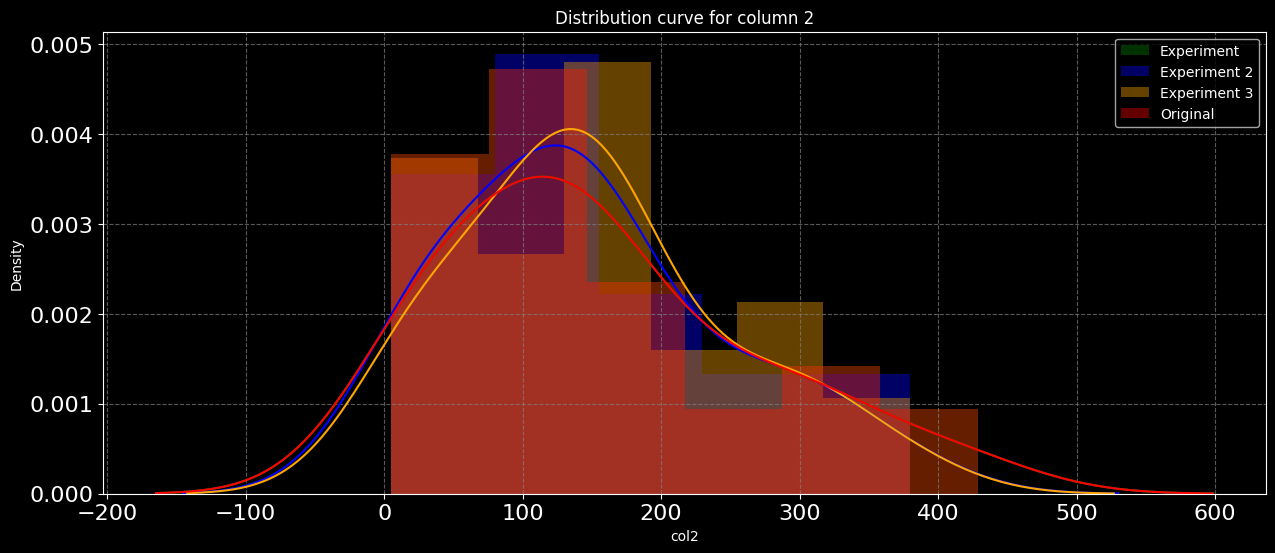

In [173]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
sns.distplot(df_temp.col2, color="green", label="Experiment")
sns.distplot(df_temp2.col2, color="blue", label="Experiment 2")
sns.distplot(df_temp3.col2, color="orange", label="Experiment 3")
sns.distplot(original_df.col2, color="Red", label ="Original")
plt.title("Distribution curve for column 2")
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.legend()
plt.show()

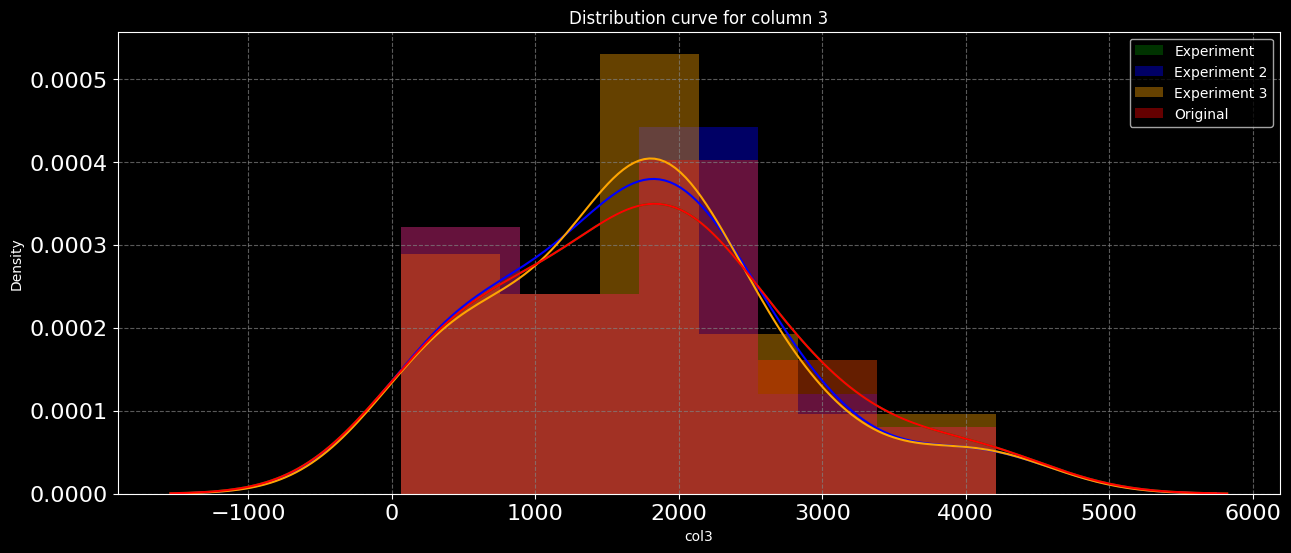

In [174]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
sns.distplot(df_temp.col3, color="green", label="Experiment")
sns.distplot(df_temp2.col3, color="blue", label="Experiment 2")
sns.distplot(df_temp3.col3, color="orange", label="Experiment 3")
sns.distplot(original_df.col3, color="Red", label ="Original")
plt.title("Distribution curve for column 3")
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.legend()
plt.show()

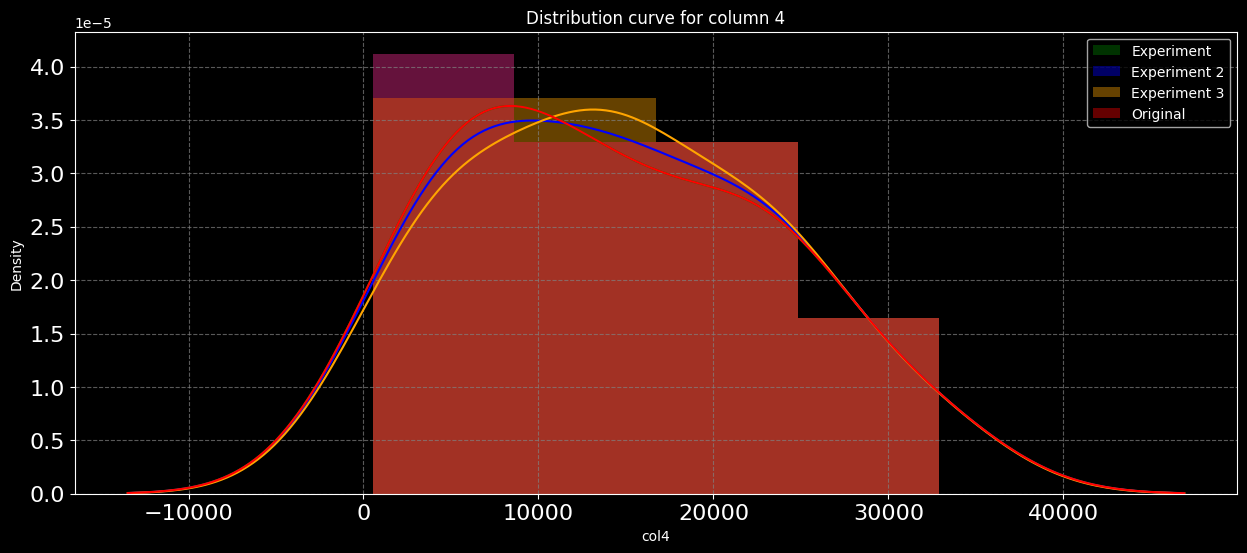

In [175]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
sns.distplot(df_temp.col4, color="green", label="Experiment")
sns.distplot(df_temp2.col4, color="blue", label="Experiment 2")
sns.distplot(df_temp3.col4, color="orange", label="Experiment 3")
sns.distplot(original_df.col4, color="Red", label ="Original")
plt.title("Distribution curve for column 4")
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.legend()
plt.show()

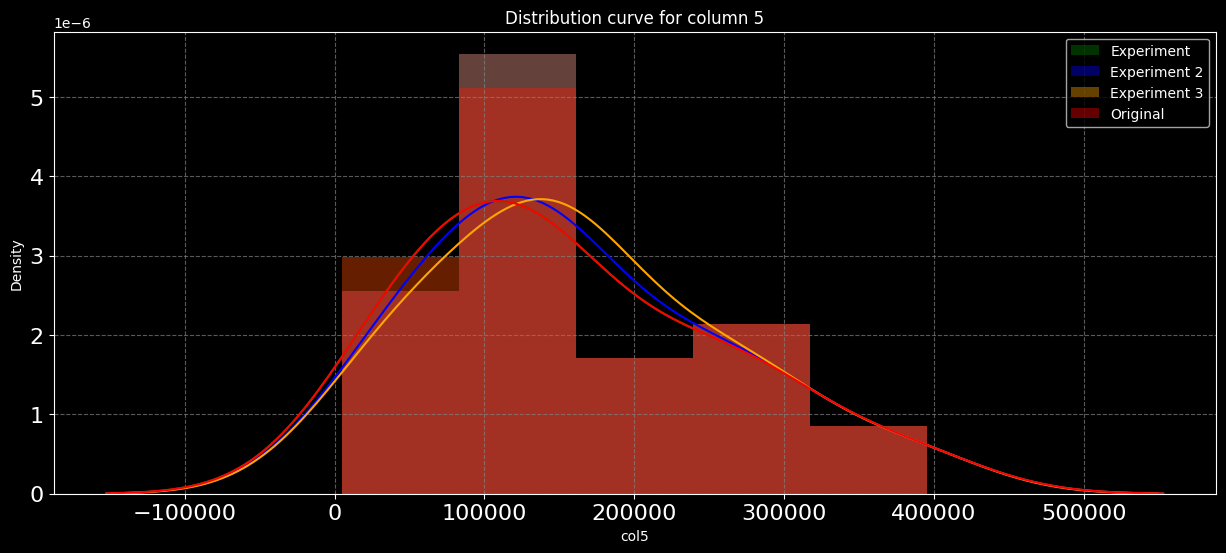

In [176]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
sns.distplot(df_temp.col5, color="green", label="Experiment")
sns.distplot(df_temp2.col5, color="blue", label="Experiment 2")
sns.distplot(df_temp3.col5, color="orange", label="Experiment 3")
sns.distplot(original_df.col5, color="Red", label ="Original")
plt.title("Distribution curve for column 5")
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.legend()
plt.show()